#**Medical Insurance Cost Analysis** 

In this case study we ar analyzing the how the charges should paid by a patient in a month basing other certain values like he is smoker or not.

## **Exploring dataset** 

**our data set consists of different columns for prediction of medical insurance**

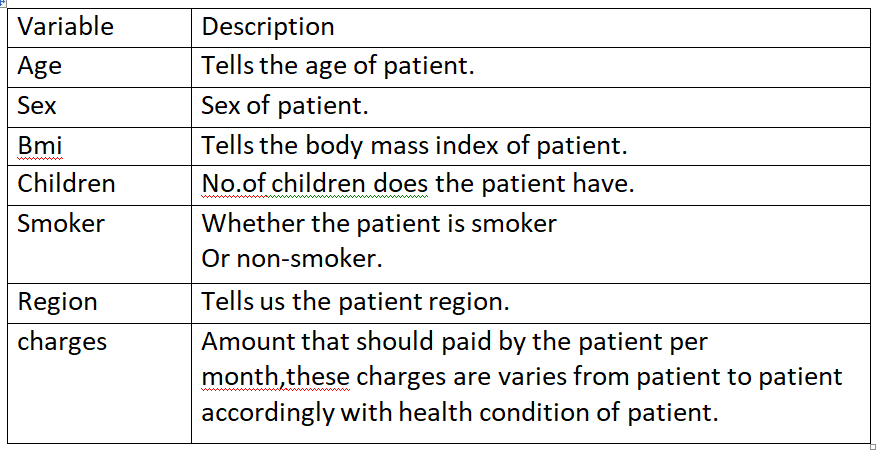

## Import all required libraries
example :pandas,numpy etc.

In [2]:
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Linear Regression
from scipy.stats import linregress

#Train_test_split
from sklearn.model_selection import train_test_split

#cross_val_score
from sklearn.model_selection import cross_val_score

#scaling
from sklearn.preprocessing import StandardScaler



from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

import numpy as np
import scipy.stats as st




imported all required libraries

##**Load Dataset**

In [3]:
#Importing data
df = pd.read_csv("https://github.com/KrishnachaithanyaThummala/Data-Science/blob/main/insurance%20(1).csv?raw=True")

loading the dataset using the pd.read_csv

#**Pre_Processing**

In [4]:

df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


 displaying the top 5 rows from the dataset

In [5]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1336,21.0,female,25.800,0,no,southwest,2007.94500
1337,61.0,female,29.070,0,yes,northwest,29141.36030
1338,23.0,female,33.400,0,no,southwest,10795.93733
1339,19.0,female,34.700,2,yes,southwest,36397.57600
1340,53.0,female,24.795,1,no,northwest,10942.13205


 displaying the bottom 5 rows from the dataset

In [6]:
df.sample(3)

,age,sex,bmi,children,smoker,region,charges
14,27.0,male,42.13,0,yes,southeast,39611.7577
89,55.0,female,26.98,0,no,northwest,11082.5772
1068,63.0,male,21.66,1,no,northwest,14349.8544


Randomly 3 rows will display from dataset,by default it will only display the 1 row randomly from dataset

In [7]:
df.shape

(1341, 7)

Dispalying numbers rows and columns

Our dataframe contains 1341 rows and 7 columns

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

It will return the column labels of the given dataframe

Inorder to predict the medical charges these are the columns provided

In [9]:
df.index

RangeIndex(start=0, stop=1341, step=1)

It will helps us to know the total number of rows, where it starts and ends,we can also know about the increment of index from one row to another

In [10]:
df.dtypes

age         float64
sex          object
bmi         float64
children     object
smoker       object
region       object
charges     float64
dtype: object

Printing the datatypes of columns labels from the dataframe

## Setting index as patient id.

In [11]:
id=[i+1 for i in range(len(df.index))]
df['patient_id']=id
df.head(5)

,age,sex,bmi,children,smoker,region,charges,patient_id
0,19.0,female,27.900,0,yes,southwest,16884.92400,1
1,18.0,male,33.770,1,no,southeast,1725.55230,2
2,28.0,male,33.000,3,no,southeast,4449.46200,3
3,33.0,male,22.705,0,no,northwest,21984.47061,4
4,32.0,male,28.880,0,no,northwest,3866.85520,5


here we are creating new column patient id and giving the data into it using ‘’id’’

In [12]:
df.set_index('patient_id',inplace=True)
df.head(5)

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
1,19.0,female,27.900,0,yes,southwest,16884.92400
2,18.0,male,33.770,1,no,southeast,1725.55230
3,28.0,male,33.000,3,no,southeast,4449.46200
4,33.0,male,22.705,0,no,northwest,21984.47061
5,32.0,male,28.880,0,no,northwest,3866.85520


here we are setting the patient id as index for the dataset df.

infographics of dataset 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 1 to 1341
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1339 non-null   float64
 1   sex       1340 non-null   object 
 2   bmi       1339 non-null   float64
 3   children  1341 non-null   object 
 4   smoker    1339 non-null   object 
 5   region    1339 non-null   object 
 6   charges   1340 non-null   float64
dtypes: float64(3), object(4)
memory usage: 83.8+ KB


To get a quick overview of the dataset we use this function , we can get the column name, count not null values in a specified column,and datatype of the column

In [14]:
df.describe()

,age,bmi,charges
count,1339.000000,1339.000000,1340.000000
mean,39.174010,30.675747,13266.041263
std,14.057975,6.088311,12099.759929
min,18.000000,15.960000,1121.873900
25%,26.000000,26.302500,4744.325050
50%,39.000000,30.400000,9388.753650
75%,51.000000,34.700000,16604.302645
max,64.000000,53.130000,63770.428010


is used to view some basic statistical details like percentile, mean, std etc. of a data frame

***Here count returns Non-null values***

In [15]:
df.loc[:,['age','bmi']]

,age,bmi
patient_id,,
1,19.0,27.900
2,18.0,33.770
3,28.0,33.000
4,33.0,22.705
5,32.0,28.880
...,...,...
1337,21.0,25.800
1338,61.0,29.070
1339,23.0,33.400


using loc function we can display data present in the particular column or rows using the labels

In [16]:
df.iloc[25,:]

age                59
sex            female
bmi             27.72
children            3
smoker             no
region      southeast
charges       14001.1
Name: 26, dtype: object

 iloc is integer position-based, so you have to specify rows and columns by their integer position values

## Miscategorized values

In [17]:
df.dtypes

age         float64
sex          object
bmi         float64
children     object
smoker       object
region       object
charges     float64
dtype: object

Printing the datatypes of columns labels from the dataframe

In [18]:
df['children'].value_counts()

0      575
1      325
2      240
3      156
4       25
5       18
yes      1
no       1
Name: children, dtype: int64

using  value of counts function we can get the sum of all unique data in a particular column

In [19]:
df['age'] = df['age'].replace(r'[A-Za-z]+', np.nan, regex = True) 
df['sex'] = df['sex'].replace(r'[0-9]+', np.nan, regex = True)
df['bmi'] = df['bmi'].replace(r'[A-Za-z]+', np.nan, regex = True) 
df['children'] = df['children'].replace(r'[A-Za-z]+', np.nan, regex = True) 
df['smoker'] = df['smoker'].replace(r'[0-9]+', np.nan, regex = True)
df['region'] = df['region'].replace(r'[0-9]+', np.nan, regex = True)
df['charges'] = df['charges'].replace(r'[A-Za-z]+', np.nan, regex = True)

replacing all miscategorised values present in the dataset with null values

In [20]:
df['children'].value_counts()

0    575
1    325
2    240
3    156
4     25
5     18
Name: children, dtype: int64

So we can say that we have removed all the miscategorized values

**checking for duplicates**

In [21]:
df.duplicated()

patient_id
1       False
2       False
3       False
4       False
5       False
        ...  
1337    False
1338    False
1339     True
1340     True
1341     True
Length: 1341, dtype: bool

helps in analyzing duplicate values only. It returns a boolean series which is True only for Unique elements

In [22]:
df.drop_duplicates(inplace=True)


dropping the duplicates present in the dataset

## null values

In [23]:
df.notna()

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
1334,True,False,True,True,True,True,True
1335,True,True,True,True,True,True,True
1336,True,True,True,True,True,True,True


finding the null values in dataset, whereever there is null value it returns false boolean value

## **Finding count of missing values in each column**

In [24]:
df.isnull().sum()

age         2
sex         1
bmi         2
children    2
smoker      3
region      2
charges     1
dtype: int64

total count of null values pressent in the each column

In [25]:
df.isnull().sum().sum()

13

total number of null values present in the entire dataset

In [26]:
df['smoker'].value_counts()

no     1060
yes     274
Name: smoker, dtype: int64

by this we can say that total no.of smokers and non-smokers present

In [27]:
df['sex'].value_counts()

male      674
female    662
Name: sex, dtype: int64

counting total no.of male and female present in the dataset

##Filling null values with appropriate values

In [28]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
val= imputer.fit_transform(np.array(df['smoker']).reshape(-1,1))

val=pd.DataFrame(val)
for i in range(1,len(val)+1):
  df.loc[i,'smoker']=val.iloc[i-1,0]
df['smoker'].isnull().sum()

0

In [29]:
df.isnull().sum()

age         3
sex         2
bmi         3
children    3
smoker      0
region      3
charges     2
dtype: int64

In [30]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
val= imputer.fit_transform(np.array(df['sex']).reshape(-1,1))

val=pd.DataFrame(val)
for i in range(1,len(val)+1):
  df.loc[i,'sex']=val.iloc[i-1,0]
df['sex'].isnull().sum()

0

In [31]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
val= imputer.fit_transform(np.array(df['region']).reshape(-1,1))

val=pd.DataFrame(val)
for i in range(1,len(val)+1):
  df.loc[i,'region']=val.iloc[i-1,0]
df['region'].isnull().sum()

0

In [32]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
val= imputer.fit_transform(np.array(df['children']).reshape(-1,1))

val=pd.DataFrame(val)
for i in range(1,len(val)+1):
  df.loc[i,'children']=val.iloc[i-1,0]
df['children'].isnull().sum()

0

filling the nan values present in the sex,region,smoker,children columns with most repeated values and checking whether values replaced or not.

In [33]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
val= imputer.fit_transform(np.array(df['age']).reshape(-1,1))

val=pd.DataFrame(val)
for i in range(1,len(val)+1):
  df.loc[i,'age']=val.iloc[i-1,0]
df['age'].isnull().sum()

0

In [34]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
val= imputer.fit_transform(np.array(df['bmi']).reshape(-1,1))

val=pd.DataFrame(val)
for i in range(1,len(val)+1):
  df.loc[i,'bmi']=val.iloc[i-1,0]
df['bmi'].isnull().sum()

0

In [35]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
val= imputer.fit_transform(np.array(df['charges']).reshape(-1,1))

val=pd.DataFrame(val)
for i in range(1,len(val)+1):
  df.loc[i,'charges']=val.iloc[i-1,0]
df['charges'].isnull().sum()

0

filling the nan values present in the age,bmi,children columns with mean and median because these column are numerical data and checking whether values replaced or not.

In [36]:
df.isnull().sum().sum()

0

In [37]:
df

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
1,19.0,female,27.900000,0,yes,southwest,16884.924000
2,18.0,male,33.770000,1,no,southeast,1725.552300
3,28.0,male,33.000000,3,no,southeast,4449.462000
4,33.0,male,22.705000,0,no,northwest,21984.470610
5,32.0,male,28.880000,0,no,northwest,3866.855200
...,...,...,...,...,...,...,...
1335,18.0,female,36.850000,0,no,southeast,1629.833500
1336,21.0,female,25.800000,0,no,southwest,2007.945000
1337,61.0,female,29.070000,0,yes,northwest,29141.360300


In [38]:
df[df['smoker']=="yes"]

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
1,19.0,female,27.900000,0,yes,southwest,16884.924000
12,62.0,female,26.290000,0,yes,southeast,27808.725100
15,27.0,male,42.130000,0,yes,southeast,39611.757700
20,30.0,male,35.300000,0,yes,southwest,36837.467000
24,34.0,female,31.920000,1,yes,northeast,37701.876800
...,...,...,...,...,...,...,...
1314,30.0,female,23.655000,3,yes,northwest,18765.875450
1321,62.0,male,26.695000,0,yes,northeast,28101.333050
1323,42.0,female,40.370000,2,yes,southeast,43896.376300


In [39]:
df.query(" smoker=='yes' and region=='northwest'")

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
56,58.0,male,36.955,2,yes,northwest,47496.494450
65,20.0,female,22.420,0,yes,northwest,14711.743800
86,45.0,male,22.895,2,yes,northwest,21098.554050
87,57.0,female,31.160,0,yes,northwest,43578.939400
106,20.0,male,28.025,1,yes,northwest,17560.379750
129,32.0,female,17.765,2,yes,northwest,32734.186300
145,30.0,male,28.690,3,yes,northwest,20745.989100
147,46.0,male,30.495,3,yes,northwest,40720.551050
161,42.0,female,26.600,0,yes,northwest,21348.706000


displaying the total no.of smokers present in the northwest region

# **Visualization**

## Scatter plot

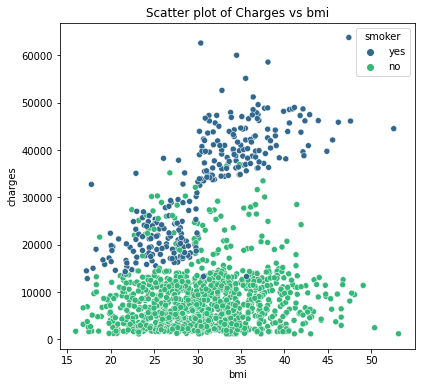

In [40]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

We can infer that as the charges grows the smokers rate also grows 

## Strip plot

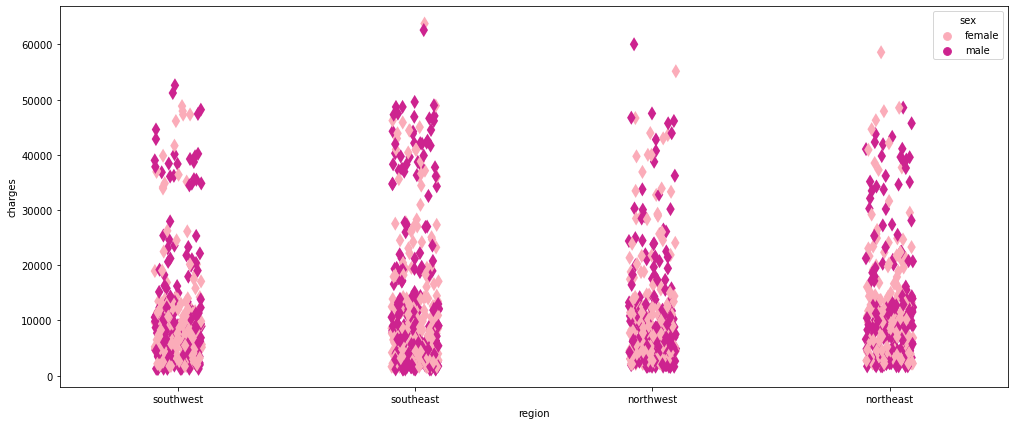

In [41]:
plt.figure(figsize=(17,7))
sns.stripplot(x= "region", y = "charges", hue="sex", size=10, data = df,marker= 'd',palette='RdPu')
plt.show()

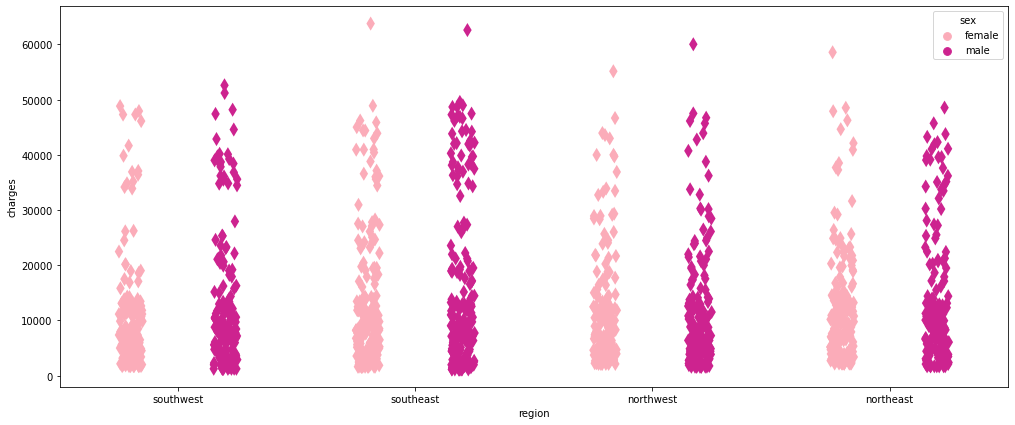

In [42]:
plt.figure(figsize=(17,7))
sns.stripplot(x= "region", y = "charges", hue="sex", size=10, data = df,dodge=True,marker= 'd',palette='RdPu')
plt.show()

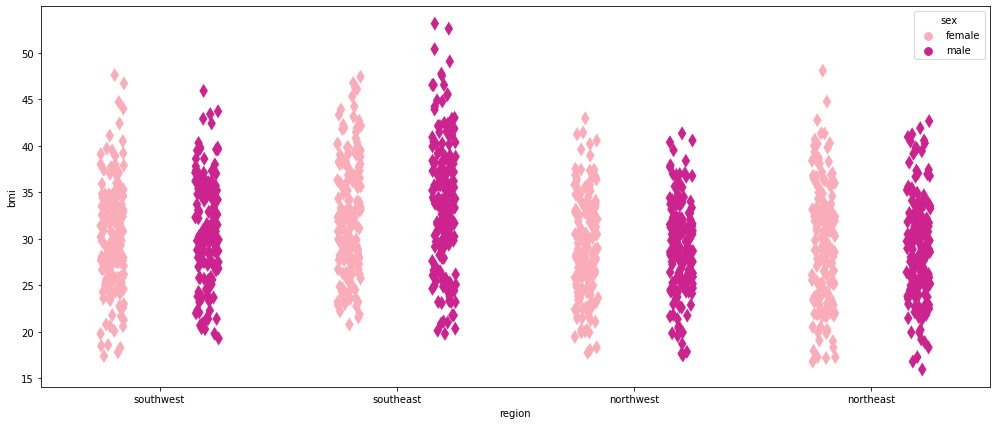

In [43]:
plt.figure(figsize=(17,7))
sns.stripplot(x= "region", y = "bmi", hue="sex", size=10, data = df,dodge=True,marker= 'd',palette='RdPu')
plt.show()

we can infer that their are  more no.of males in southeast and northwest than compared to other regions more no.of people having less charges

## Swarm plot

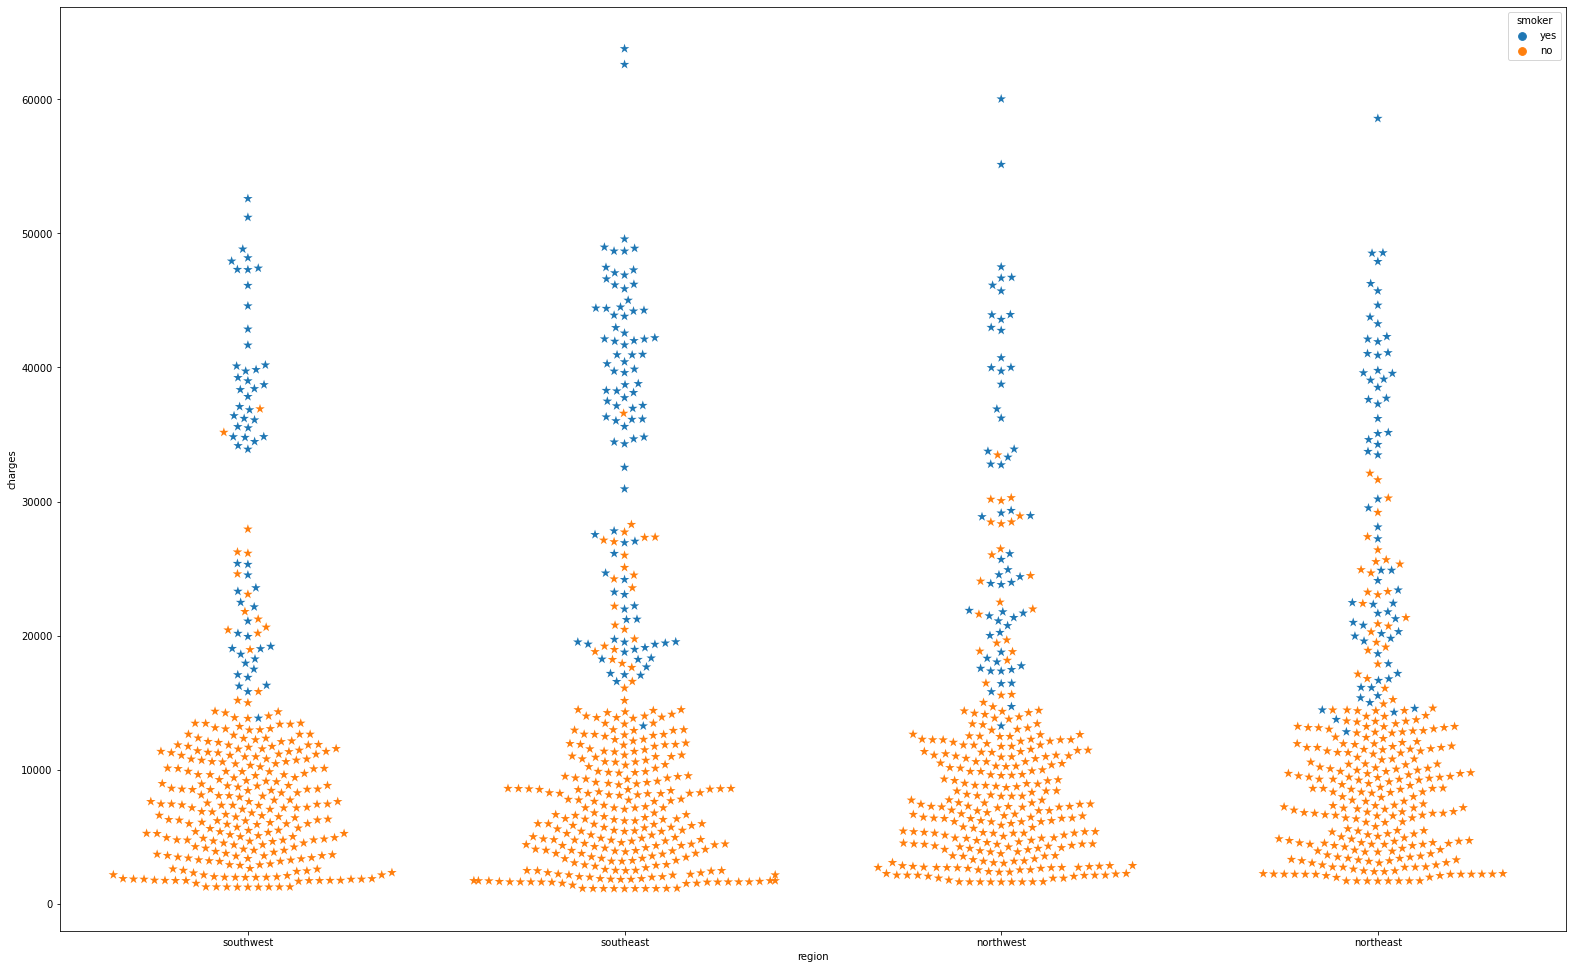

In [44]:

plt.figure(figsize=(27,17))
sns.swarmplot(x= "region", y = "charges", hue="smoker", size=10, data = df,marker= '*')
plt.show()

we can infer that compared to other regions in southwest  having less smokers even the charges goes up

## Heat map

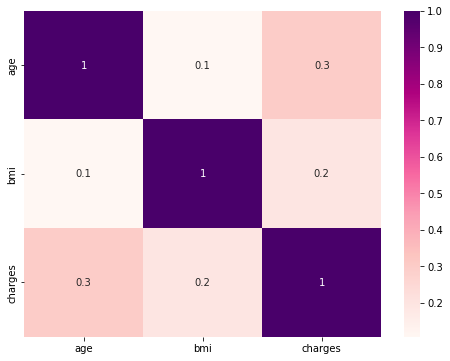

In [45]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="RdPu", cbar=True);

we can infer that bmi and age are lowly correlated 

##  Bar plot

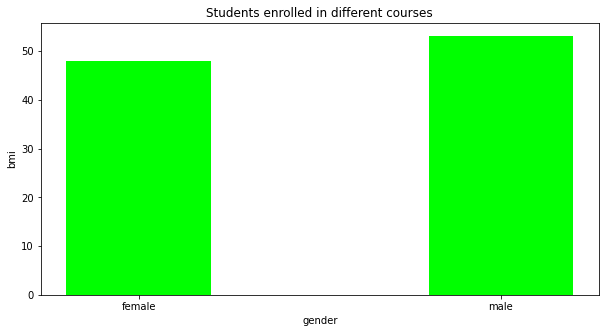

In [46]:


fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(df.sex, df.bmi, color ='lime',width = 0.4)
plt.xlabel("gender")
plt.ylabel("bmi")
plt.title("Students enrolled in different courses")
plt.show()

we can infer that  more no.of mens are obese compared to females



## Violin plot and Box plot

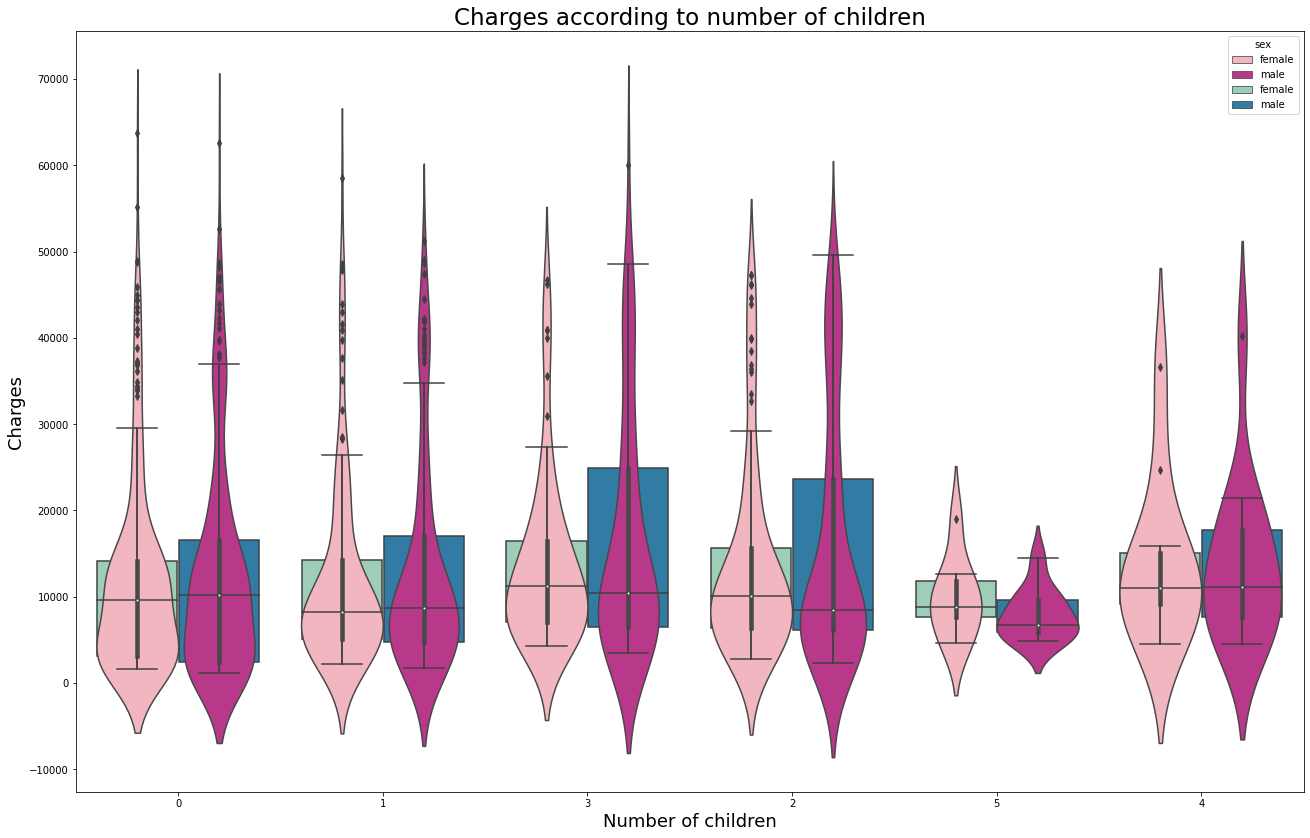

In [47]:
#Creating a violinplot for each category
plt.figure(figsize=(22,14))
sns.violinplot(x='children', y='charges', data=df, hue='sex', palette='RdPu')
sns.boxplot(x='children', y='charges', data=df, hue='sex', palette='YlGnBu')
plt.title('Charges according to number of children', size='23')
plt.ylabel('Charges',size=18)
plt.xlabel('Number of children',size=18)
plt.show()

people both the male and females  with 4 childs are having same median  and compared to males females having more outliers

## Hist plot

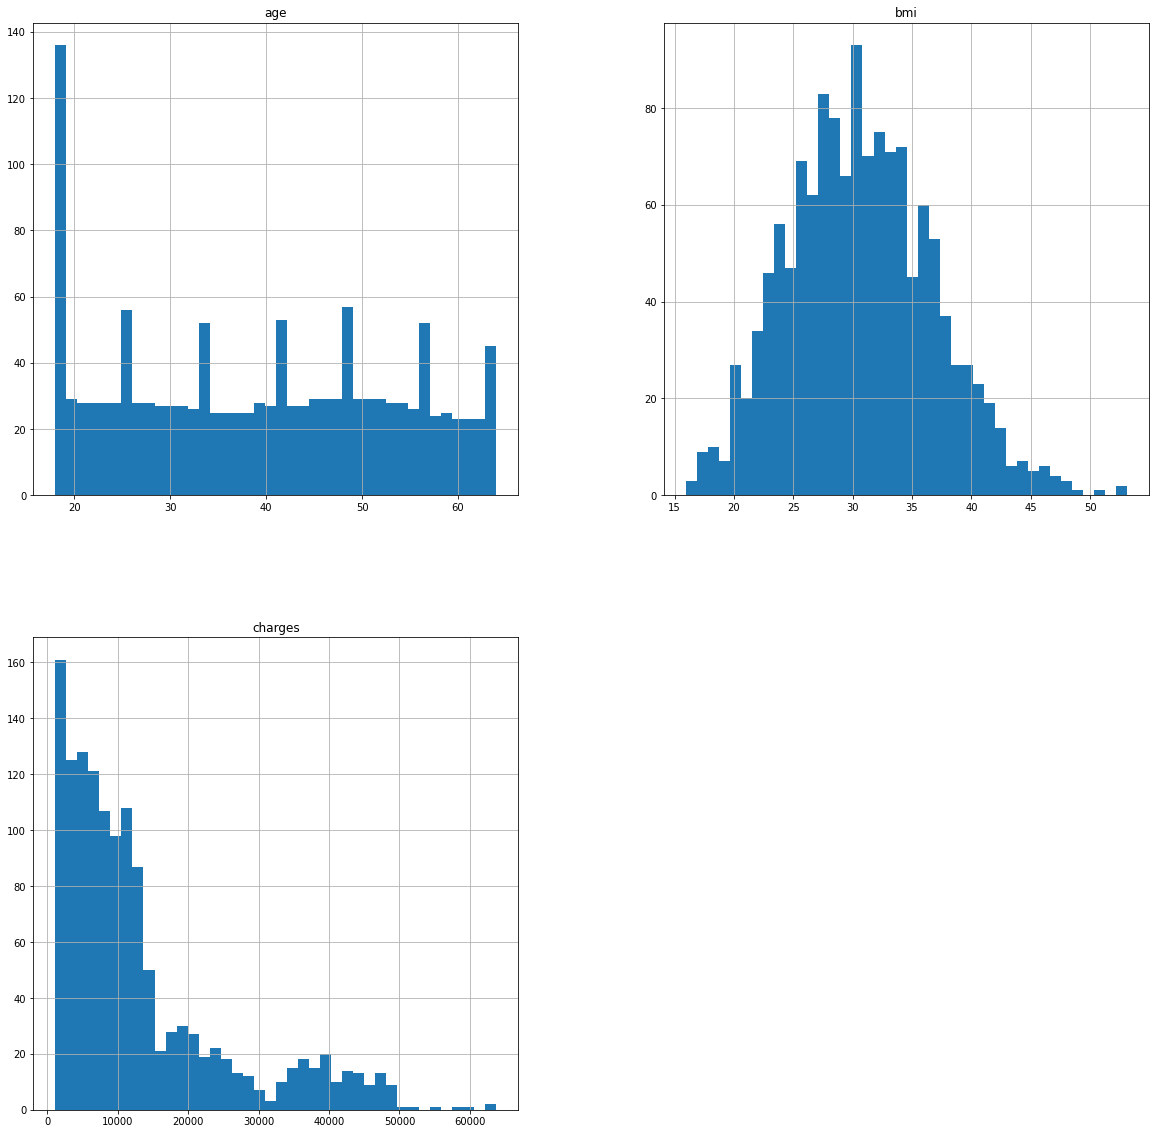

In [48]:
df.hist(bins=40 , figsize=(20,20)) #Pandas Hist function
plt.show()

## Pie chart

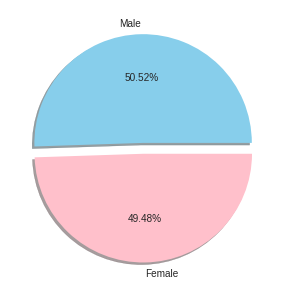

In [49]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=df["sex"].value_counts(), 
        colors=["skyblue","pink"], 
        labels=["Male","Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

we can infer that male are more in number than female

##Box plot

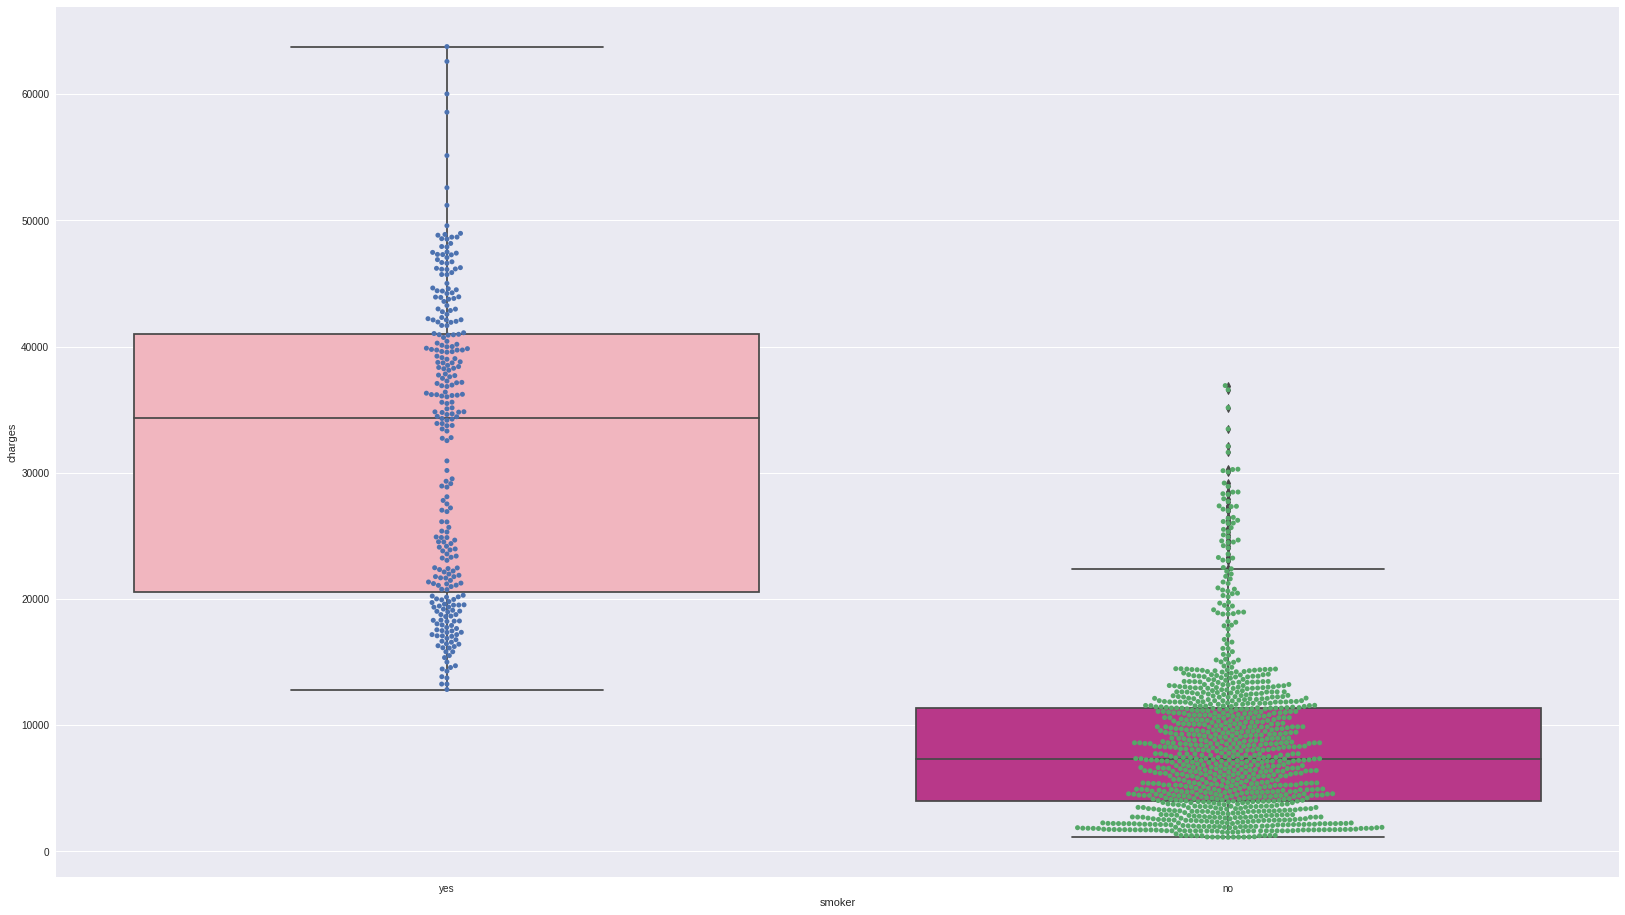

In [50]:
plt.figure(figsize=(28,16))
sns.boxplot(x=df.smoker, y=df.charges,palette='RdPu')
sns.swarmplot(x=df.smoker, y=df.charges)

smokers skewed to the left and people who dont smoke skewed to the right and their are few outliers in no part 

## Count plot

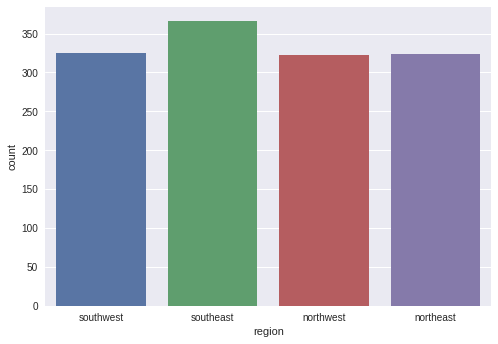

In [51]:
sns.countplot(x='region',data=df)

we can infer that compared to other regions more no.of people live in southeast 

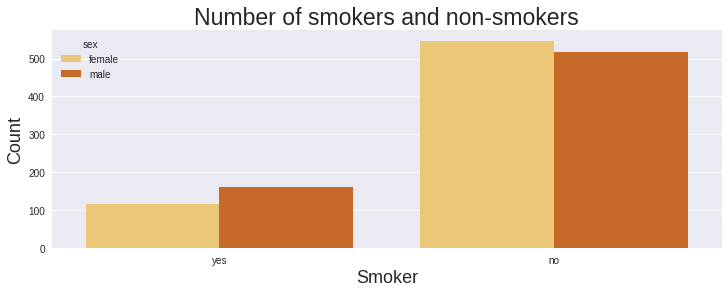

In [52]:
#Countplot to compare the number of smokers and non-smokers
plt.figure(figsize=(12,4))
sns.countplot(x='smoker', data=df, hue='sex', palette='YlOrBr') 
plt.title('Number of smokers and non-smokers', size='23')
plt.ylabel('Count',size=18)
plt.xlabel('Smoker',size=18)
plt.show()

we can infer that male smoke more than female

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


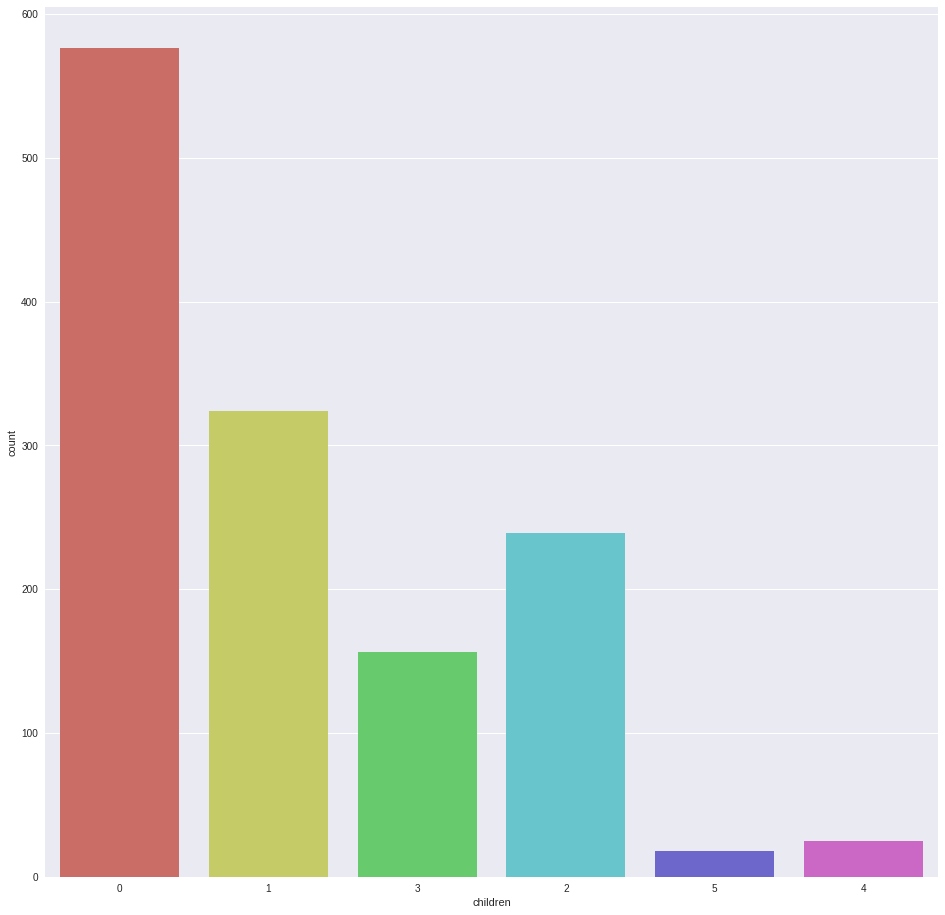

In [53]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(16,16))
sns.countplot(df["children"], palette="hls");

we can infer that their are more people with no children


## Distribution plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


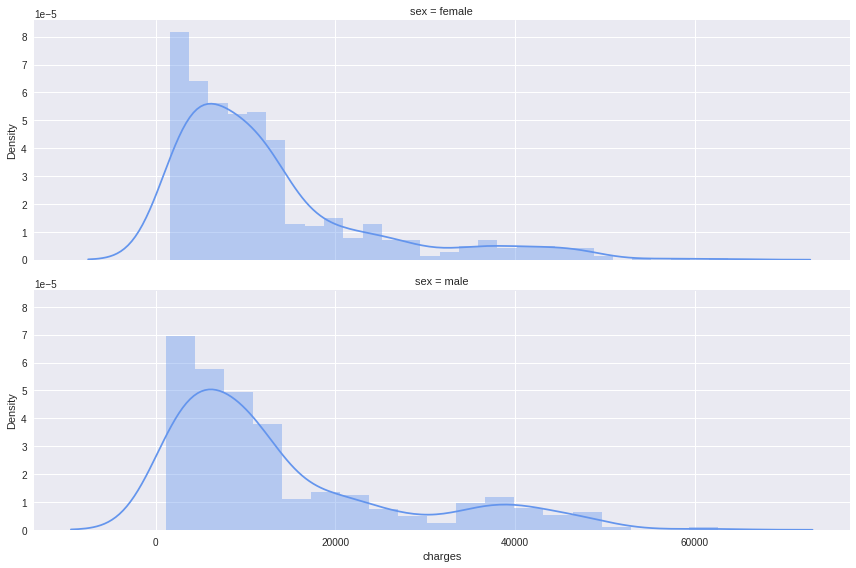

In [54]:
x1 = sns.FacetGrid(df, row='sex', height=4, aspect=3)
x1 = x1.map(sns.distplot, 'charges', color='cornflowerblue')
plt.show()

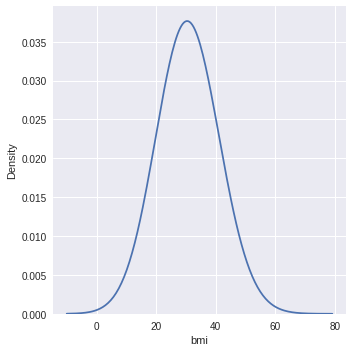

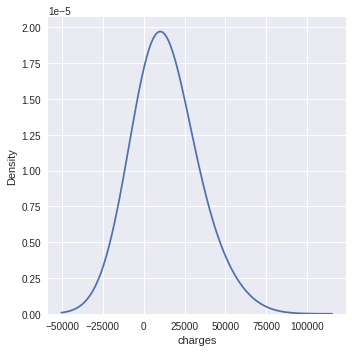

In [55]:
sns.displot(data=df,x="bmi",kind='kde',bw_adjust=6)
sns.displot(data=df,x="charges",kind='kde',bw_adjust=6)


we can infer that bmi is normally distributed and charges are slightly skewed to the left 

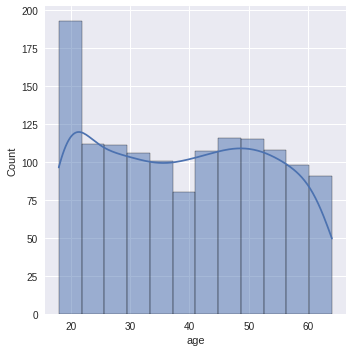

In [56]:
sns.displot(df.age, kde=True) # Histogram with a kernel density estimate (Density Curve)
plt.show()

# Encoding

In [57]:
df.dtypes

age         float64
sex          object
bmi         float64
children     object
smoker       object
region       object
charges     float64
dtype: object

In [58]:
data=df

In [59]:

var_df = df.select_dtypes(include=['object']).copy()
var_df.head()

,sex,children,smoker,region
patient_id,,,,
1,female,0,yes,southwest
2,male,1,no,southeast
3,male,3,no,southeast
4,male,0,no,northwest
5,male,0,no,northwest


In [60]:

var_df[var_df.isnull().any(axis=1)]

,sex,children,smoker,region
patient_id,,,,


as we took care of the null values we can proceed with encoding with the catagorical data in order to analyse the data effectly
catagorical variables are: 

In [61]:
var_df.columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

no.of children will follow certain order so we will  label encode "children" column and proceed with one hot encoding for other columns  

In [62]:
var_df['children'].value_counts()

0    576
1    324
2    239
3    156
4     25
5     18
Name: children, dtype: int64

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
var_df["children"] = le.fit_transform(var_df['children'])
var_df

,sex,children,smoker,region
patient_id,,,,
1,female,0,yes,southwest
2,male,1,no,southeast
3,male,3,no,southeast
4,male,0,no,northwest
5,male,0,no,northwest
...,...,...,...,...
1335,female,0,no,southeast
1336,female,0,no,southwest
1337,female,0,yes,northwest


In [64]:
var_df['children'].value_counts()

0    576
1    324
2    239
3    156
4     25
5     18
Name: children, dtype: int64

In [65]:

var_df2=pd.get_dummies(var_df, columns=['sex','region']).head()
var_df2.head()
var_df2['children'].value_counts()

0    3
3    1
1    1
Name: children, dtype: int64

In [66]:
df['children']=var_df['children']
df['children'].value_counts()

0    576
1    324
2    239
3    156
4     25
5     18
Name: children, dtype: int64

In [67]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [68]:

df=pd.get_dummies(df, columns=['sex','region','smoker'])
df.head()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
patient_id,,,,,,,,,,,,
1,19.0,27.900,0,16884.92400,1,0,0,0,0,1,0,1
2,18.0,33.770,1,1725.55230,0,1,0,0,1,0,1,0
3,28.0,33.000,3,4449.46200,0,1,0,0,1,0,1,0
4,33.0,22.705,0,21984.47061,0,1,0,1,0,0,1,0
5,32.0,28.880,0,3866.85520,0,1,0,1,0,0,1,0


In [69]:
df['children'].value_counts()

0    576
1    324
2    239
3    156
4     25
5     18
Name: children, dtype: int64

In [70]:
df.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
sex_female          0
sex_male            0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
smoker_no           0
smoker_yes          0
dtype: int64

In [71]:
df.dtypes

age                 float64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
smoker_no             uint8
smoker_yes            uint8
dtype: object

# removing outliers

In [72]:
my_list = df['bmi']

In [73]:
def get_lower_upper_bound(my_data):
    # Get first and third quartile
    q1 = np.percentile(my_data, 25)
    q3 = np.percentile(my_data, 75)
    
    # Calculate Interquartile range
    iqr = q3 - q1
    
    # Compute lower and upper bound
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return lower_bound, upper_bound

In [74]:
def get_outliers_iqr(my_data):
    lower_bound, upper_bound = get_lower_upper_bound(my_data)
    # Filter data less than lower bound and more than upper bound
    return my_data[np.where((my_data > upper_bound) |
                            (my_data < lower_bound))]

In [75]:
Q1 = np.percentile(my_list,25)
Q2 = np.percentile(my_list,50)
Q3 = np.percentile(my_list,75)
print("Q1: ",Q1)
print("Q2: ",Q2)
print("Median:",np.median(my_list))
print("Q3: ",Q3)

Q1:  26.315
Q2:  30.4
Median: 30.4
Q3:  34.69375


In [76]:
IQR=Q3-Q1
print("Inter Quartile Range: ",IQR)

Inter Quartile Range:  8.37875


Text(0, 0.5, 'Data points')

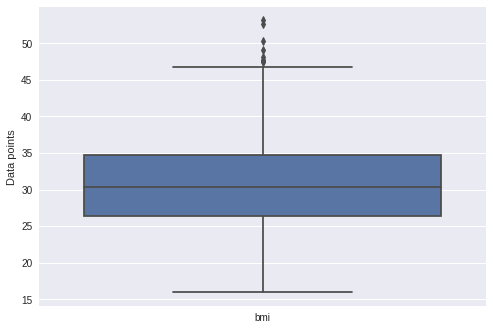

In [77]:
# Convert the list to dataframe and add column name


# Plot using seaborm
sns.boxplot(data=pd.DataFrame(df['bmi']))

# Add ylabel
plt.ylabel('Data points')

In [78]:
outlier=get_outliers_iqr(my_list.values)

In [79]:
p=[]
for i in df.index.values:
  if df.loc[i,'bmi'] in outlier:
    p.append(i)
p

[117, 287, 402, 544, 847, 860, 1047, 1088, 1317]

In [80]:
for i  in p:
  df.drop(i,inplace=True,axis=0)
df

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
patient_id,,,,,,,,,,,,
1,19.0,27.900000,0,16884.924000,1,0,0,0,0,1,0,1
2,18.0,33.770000,1,1725.552300,0,1,0,0,1,0,1,0
3,28.0,33.000000,3,4449.462000,0,1,0,0,1,0,1,0
4,33.0,22.705000,0,21984.470610,0,1,0,1,0,0,1,0
5,32.0,28.880000,0,3866.855200,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,18.0,36.850000,0,1629.833500,1,0,0,0,1,0,1,0
1336,21.0,25.800000,0,2007.945000,1,0,0,0,0,1,1,0
1337,61.0,29.070000,0,29141.360300,1,0,0,1,0,0,0,1


In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

val_df=df
val_df.drop('charges',axis=1)
data_standrd=scaler.fit_transform(val_df)
data_standrd

array([[-1.44077267, -0.44852999, -0.90530412, ...,  1.7612075 ,
        -1.97130145,  1.97130145],
       [-1.51208954,  0.54530947, -0.07668899, ..., -0.56779227,
         0.50727909, -0.50727909],
       [-0.79892076,  0.41494211,  1.58054128, ..., -0.56779227,
         0.50727909, -0.50727909],
       ...,
       [ 1.55453623, -0.25043933, -0.90530412, ..., -0.56779227,
        -1.97130145,  1.97130145],
       [-0.01443509,  0.02132769, -0.90530412, ..., -0.56779227,
        -1.97130145,  1.97130145],
       [-0.01443509,  2.51944372,  0.75192615, ..., -0.56779227,
         0.50727909, -0.50727909]])

#Heat map

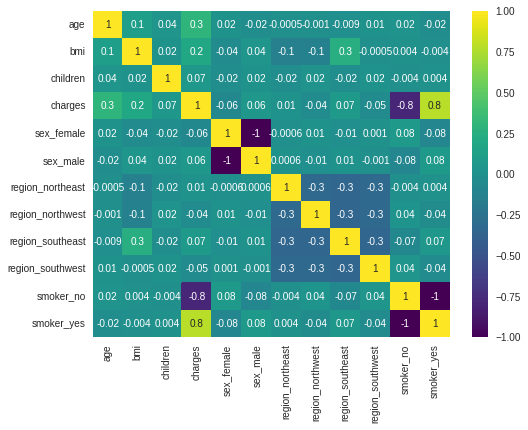

In [82]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=True);

smokers and charges are linearly related as charges smokers  increases no.of smokers also increases

#Exploratory Data Analysis

In [83]:
edf=df
edf

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
patient_id,,,,,,,,,,,,
1,19.0,27.900000,0,16884.924000,1,0,0,0,0,1,0,1
2,18.0,33.770000,1,1725.552300,0,1,0,0,1,0,1,0
3,28.0,33.000000,3,4449.462000,0,1,0,0,1,0,1,0
4,33.0,22.705000,0,21984.470610,0,1,0,1,0,0,1,0
5,32.0,28.880000,0,3866.855200,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,18.0,36.850000,0,1629.833500,1,0,0,0,1,0,1,0
1336,21.0,25.800000,0,2007.945000,1,0,0,0,0,1,1,0
1337,61.0,29.070000,0,29141.360300,1,0,0,1,0,0,0,1


Crosstab

North-East


In [84]:
pd.crosstab(edf.sex_male, edf.region_northeast,values=edf.smoker_yes,aggfunc=np.average)

region_northeast,0,1
sex_male,,
0,0.168337,0.181250
1,0.238659,0.233129


In North-east Region :

23% of males are smokers

18% of females are smokers

In [85]:
pd.crosstab(edf.sex_male, edf.region_northeast,values=edf.charges,aggfunc=np.average)

region_northeast,0,1
sex_male,,
0,12275.975047,12975.204888
1,13977.635064,13854.005374


Average charges of male in north-east Region = 13854

Average charges of female in North-east Region = 12975

North-west

In [86]:
pd.crosstab(edf.sex_male, edf.region_northwest,values=edf.smoker_yes,aggfunc=np.average)

region_northwest,0,1
sex_male,,
0,0.169355,0.177914
1,0.254902,0.181250


In North-west Region :

18% of males are smokers

17% of females are smokers

In [87]:
pd.crosstab(edf.sex_male, edf.region_northwest,values=edf.charges,aggfunc=np.average)

region_northwest,0,1
sex_male,,
0,12438.108424,12468.972713
1,14473.910766,12269.808517


Average charges of male in north-west Region = 12269.8

Average charges of female in North-west Region = 12468.9

South-East

In [88]:
pd.crosstab(edf.sex_male, edf.region_southeast,values=edf.smoker_yes,aggfunc=np.average)

region_southeast,0,1
sex_male,,
0,0.161157,0.200000
1,0.213992,0.298913


In South-east Region :

29% of males are smokers

20% of females are smokers

In [89]:
pd.crosstab(edf.sex_male, edf.region_southeast,values=edf.charges,aggfunc=np.average)

region_southeast,0,1
sex_male,,
0,12166.976132,13216.730756
1,13184.510826,15962.997782


Average charges of male in south-east Region = 15962.9

Average charges of female in south-east Region = 13216.7

South-west


In [90]:
pd.crosstab(edf.sex_male, edf.region_southwest,values=edf.smoker_yes,aggfunc=np.average)

region_southwest,0,1
sex_male,,
0,0.186747,0.124224
1,0.240631,0.226994


In South-west Region :

22% of males are smokers

12% of females are smokers

In [91]:
pd.crosstab(edf.sex_male, edf.region_southwest,values=edf.charges,aggfunc=np.average)

region_southwest,0,1
sex_male,,
0,12894.383969,11058.019340
1,14119.455287,13412.883576


Average charges of male in south-west Region = 13412.8

Average charges of female in south-west Region = 11058

In [92]:
pd.crosstab(edf.sex_male,edf.smoker_yes,values=edf.charges,aggfunc=np.average)

smoker_yes,0,1
sex_male,,
0,8761.069043,30249.563122
1,8114.735047,32693.297133


So, By the Above Cross tab we can say average charge on a male if he is a smoker:32693.29

Female if she is a smoker:30249.563

Male if he is not a smoker : 8114.73

Female if she is not a smoker : 8761

In [93]:
pd.crosstab(edf.sex_male,edf.smoker_yes,values=edf.bmi,aggfunc=np.average)

smoker_yes,0,1
sex_male,,
0,30.507418,29.291504
1,30.617662,31.366416


As we can see both male and female either smoker or non-smoker on an average they have Almost same BMI

But we can observe that smoker female are having less BMI Compared to non-smoker female BMI

And Smoker male is having more BMI Compared to non-smoker male BMI

In [94]:
pd.crosstab(edf.sex_male,edf.smoker_yes)

smoker_yes,0,1
sex_male,,
0,546,113
1,511,159


In [95]:
pd.crosstab(edf.sex_male, edf.age,values=edf.charges,aggfunc=np.average,margins=True)

age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,All
sex_male,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,6522.257919,9611.799484,7351.917571,5350.394655,7635.835562,18590.470551,6569.819790,7993.993028,6013.517349,13961.746882,6515.807413,7341.088823,9611.568646,8744.112560,8926.278728,12438.700349,10936.606712,11351.976651,6711.424371,17904.161518,6425.675692,9657.108564,13998.824182,7624.685776,12174.456208,18587.201719,17161.755149,12738.361805,14821.204377,16076.638427,13495.785693,12084.881089,12983.801714,16990.847907,15988.855532,17401.208162,12893.692962,16083.465636,11754.916000,16710.001224,13199.858174,19974.849426,17307.327752,22010.952889,16707.712059,22345.556404,23493.178700,12445.742535
1,7787.172496,10118.496726,11166.670842,4193.191381,9756.775568,6542.332168,14726.212134,11436.821289,6238.092207,10407.656561,11622.567716,13298.580781,15604.684805,11546.072300,9514.321854,12264.365625,12290.449530,11265.833152,17274.985462,15956.808402,9919.546487,13748.403047,9704.719357,11537.872675,14418.400270,19999.669198,14456.856598,16782.582037,14255.103088,20210.191692,15850.409109,13307.131439,18163.591449,14280.192968,21526.929098,14640.653348,20989.347485,16245.625341,18296.115673,16184.369276,14924.947114,17726.974646,26262.168367,22039.190030,21843.286953,17200.753432,23057.882975,13947.557990
All,7173.316892,9868.929428,9325.065815,4730.464330,8735.582231,12789.515034,10648.015962,9838.365311,6133.825309,12184.701721,9069.187564,10430.158727,12719.110358,10196.980573,9220.300291,12351.532987,11613.528121,11307.182031,12204.476138,16849.345247,8102.733674,11702.755806,11772.251310,9653.745650,13296.428239,19267.278653,15859.396587,14830.199856,14517.935829,17995.788157,14632.500445,12696.006264,15663.003301,15682.255867,18560.103974,16020.930755,17091.439752,16164.545488,15025.515837,16447.185250,14024.900710,18895.869532,21979.418507,22024.457609,19163.856573,19884.998461,23275.530837,13202.865451


Above is the Average charges of Different age groups across all the regions.

Age 60,61,64 has an average charge above 20000

Conclusion:

Out of all regions South-west females smoke less 

So they have low charges

And more number South-east males smoke

So, they have high charges



Sorting Values

In [96]:
sv=edf.sort_values(['charges'],ascending=False)
sv[['charges','age','smoker_yes','sex_male']].head(50)

,charges,age,smoker_yes,sex_male
patient_id,,,,
1300,62592.87309,45.0,1,1
1230,60021.39897,52.0,1,1
578,58571.07448,31.0,1,0
819,55135.40209,33.0,1,0
1146,52590.82939,60.0,1,1
35,51194.55914,28.0,1,1
1241,49577.66240,64.0,1,1
1062,48970.24760,59.0,1,1
489,48885.13561,44.0,1,0


In [97]:
sv[['charges','age','smoker_yes','sex_male']].tail(60)

,charges,age,smoker_yes,sex_male
patient_id,,,,
1129,1728.89700,19.0,0,0
233,1727.78500,19.0,0,0
710,1727.54000,18.0,0,1
2,1725.55230,18.0,0,1
1283,1720.35370,18.0,0,1
271,1719.43630,18.0,0,1
648,1712.22700,18.0,0,1
1023,1711.02680,18.0,0,1
1296,1708.92575,18.0,0,1


By the above sorted values we can say that smokers are getting high charges compared to non-smokers.

In [98]:
sv1=edf.sort_values(['sex_male','charges'],ascending=False)
sv1[['sex_male', 'charges','age']].head(50)

,sex_male,charges,age
patient_id,,,
1300,1,62592.87309,45.0
1230,1,60021.39897,52.0
1146,1,52590.82939,60.0
35,1,51194.55914,28.0
1241,1,49577.66240,64.0
1062,1,48970.24760,59.0
531,1,48675.51770,57.0
901,1,48673.55880,60.0
282,1,48549.17835,54.0


By the above sorted values we can say that most of the males who are above 45 age are getting high charges.

In [99]:
sv2=edf.sort_values(['smoker_yes','sex_male','charges'],ascending=False)
sv2[['charges','sex_male','age', 'smoker_yes']].head(60)

,charges,sex_male,age,smoker_yes
patient_id,,,,
1300,62592.87309,1,45.0,1
1230,60021.39897,1,52.0,1
1146,52590.82939,1,60.0,1
35,51194.55914,1,28.0,1
1241,49577.66240,1,64.0,1
1062,48970.24760,1,59.0,1
531,48675.51770,1,57.0,1
901,48673.55880,1,60.0,1
282,48549.17835,1,54.0,1


most of the males who are smokers are getting high charges irrespective of their age

In [100]:
sv3=edf.sort_values(['smoker_no','sex_male','charges'],ascending=False)
sv3[['smoker_no','sex_male', 'age','charges']].head(60)

,smoker_no,sex_male,age,charges
patient_id,,,,
936,1,1,44.0,32108.66282
388,1,1,50.0,30284.64294
116,1,1,60.0,30259.99556
63,1,1,64.0,30166.61817
1258,1,1,55.0,30063.58055
959,1,1,48.0,28468.91901
770,1,1,61.0,27941.28758
517,1,1,20.0,27724.28875
141,1,1,34.0,27375.90478


Charges are low for non-smoker males irrespective of their age compared to the males who smoke.

In [101]:
sv5=edf.sort_values(['smoker_yes','sex_female','charges'],ascending=False)
sv5[['smoker_yes','sex_female', 'charges']]

,smoker_yes,sex_female,charges
patient_id,,,
578,1,1,58571.07448
819,1,1,55135.40209
489,1,1,48885.13561
176,1,1,48824.45000
331,1,1,48517.56315
...,...,...,...
23,0,0,1137.01100
663,0,0,1136.39940
1244,0,0,1135.94070


Females who smoke are getting high charges

In [102]:
sv6=edf.sort_values(['smoker_no','sex_female','charges'],ascending=False)
sv6[['smoker_no','sex_female', 'charges']]

,smoker_no,sex_female,charges
patient_id,,,
1206,1,1,36910.608030
1012,1,1,36580.282160
243,1,1,35160.134570
599,1,1,33471.971890
574,1,1,31620.001060
...,...,...,...
158,0,0,15518.180250
1033,0,0,13747.872350
1186,0,0,13261.018027


Females who do not smoke are getting low charges compared to smoking women



Grouping

Region-Northeast


Total Population:323

smokers:67

non-smokers:256

In [103]:
G=edf.groupby(['region_northeast'])

In [104]:
G1=G.get_group(1)

Taking only North-east people to a separate dataframe(G1).

In [105]:
svG1=G1.sort_values(['charges'],ascending=False)
svG1[['charges','age','sex_male','smoker_yes']].head(60)

,charges,age,sex_male,smoker_yes
patient_id,,,,
578,58571.07448,31.0,0,1
282,48549.17835,54.0,1,1
331,48517.56315,61.0,0,1
289,47896.79135,59.0,0,1
883,46255.11250,51.0,0,1
668,45710.20785,62.0,1,1
1096,44641.19740,51.0,0,1
186,43753.33705,36.0,1,1
742,43254.41795,53.0,1,1


In the North-east Region 

High charges are for people who smoke

And there are some people who do not smoke but have high charges.

In [106]:
G1['smoker_yes'].value_counts()

0    256
1     67
Name: smoker_yes, dtype: int64

In North-East Region:

Out of 323 people 67 smoke.

In [107]:
G11=G1.groupby('smoker_yes')

In [108]:
G111=G11.get_group(1)

Taking only smokers from North-east region to a separate Dataframe(G111)

In [109]:
G111['children'].value_counts()

0    26
1    22
3    10
2     9
Name: children, dtype: int64

In North-East Region:

Out of 67 people who smoke:

26 people have no children

22 people have 1 child

10 people have 3 children

9 people  have 2 children

In [110]:
G111['age'].value_counts()

18.0    7
24.0    4
29.0    3
43.0    3
39.0    3
23.0    3
37.0    3
33.0    2
40.0    2
50.0    2
36.0    2
62.0    2
53.0    2
42.0    2
44.0    2
51.0    2
59.0    2
35.0    2
54.0    1
56.0    1
63.0    1
52.0    1
32.0    1
55.0    1
61.0    1
27.0    1
20.0    1
26.0    1
31.0    1
21.0    1
47.0    1
41.0    1
46.0    1
49.0    1
57.0    1
45.0    1
34.0    1
Name: age, dtype: int64

In North-east Region:

Most people who smoke are of age between 18 and 35.

In [111]:
G111['sex_female'].value_counts()

0    38
1    29
Name: sex_female, dtype: int64

In North-east Region:

Most people who smoke are male.

In [112]:
pd.crosstab(G111.sex_male, G111.age,values=G111.charges,aggfunc=np.average,margins=True)

age,18.0,20.0,21.0,23.0,24.0,26.0,27.0,29.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,59.0,61.0,62.0,63.0,All
sex_male,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,14283.459400,NaN,15359.1045,39707.9139,14571.890800,14455.64405,15006.57945,16386.510975,58571.07448,NaN,16776.30405,37701.8768,NaN,NaN,28783.507325,21659.930100,22331.566800,NaN,19964.746300,20784.698425,19594.809650,NaN,42111.6647,23401.30575,24106.91255,NaN,45448.15495,NaN,24873.384900,NaN,NaN,NaN,NaN,47896.791350,48517.56315,NaN,29523.1656,28032.046398
1,21270.786242,33475.81715,NaN,36189.1017,29350.001177,NaN,NaN,16138.762050,NaN,37607.5277,17904.52705,NaN,30379.18495,32263.4824,39047.285000,21305.683325,39125.332250,39597.4072,21259.377950,41034.221400,39556.494500,35069.37452,NaN,NaN,NaN,41508.129375,NaN,24869.8368,43254.417950,48549.17835,42303.69215,22412.6485,27218.43725,30184.936700,NaN,36905.77045,NaN,30926.252583
All,20272.596693,33475.81715,15359.1045,38534.9765,25655.473583,14455.64405,15006.57945,16303.928000,58571.07448,37607.5277,17340.41555,37701.8768,30379.18495,32263.4824,32204.766550,21423.765583,30728.449525,39597.4072,20612.062125,27534.539417,29575.652075,35069.37452,42111.6647,23401.30575,24106.91255,41508.129375,45448.15495,24869.8368,34063.901425,48549.17835,42303.69215,22412.6485,27218.43725,39040.864025,48517.56315,36905.77045,29523.1656,29673.536473


In North-east Region:

Average charges of smokers age-wise.

Region-Northwest

Total Population:323

smokers:58

non-smokers:265



In [113]:
H=edf.groupby(['region_northwest'])

In [114]:
G2=H.get_group(1)

Taking only North-west people into a separate Dataset(G2)

In [115]:
svG2=G2.sort_values(['charges'],ascending=False)
svG2[['charges','age','sex_male','smoker_yes']].head(60)

,charges,age,sex_male,smoker_yes
patient_id,,,,
1230,60021.39897,52.0,1,1
819,55135.40209,33.0,0,1
56,47496.49445,58.0,1,1
1301,46718.16325,62.0,1,1
1122,46661.44240,53.0,0,1
677,46130.52650,60.0,1,1
570,45702.02235,48.0,1,1
587,43943.87610,34.0,0,1
257,43921.18370,56.0,1,1


In the North-west Region

High charges are for people who smoke

And there are some people who do not smoke but have high charges.

In [116]:
G2['smoker_yes'].value_counts()

0    265
1     58
Name: smoker_yes, dtype: int64

In North-west Region:

58 people smoke out of 265.

In [117]:
G22=G2.groupby('smoker_yes')

In [118]:
G222=G22.get_group(1)

Taking only smoking people from North-west region to a separate dataframe(G222)

In [119]:
G222['children'].value_counts()

0    24
3    13
2    11
1     9
4     1
Name: children, dtype: int64

In North-west Region:

Out of 58 people who smoke:

24 people have no children

13 people have 3 children

11 people have 2 children

9 people have  1 child

1 people have 4 children

In [120]:
G222['age'].value_counts()

19.0    8
20.0    3
52.0    3
45.0    3
30.0    3
35.0    2
46.0    2
34.0    2
56.0    2
42.0    2
27.0    2
32.0    2
43.0    2
47.0    2
61.0    2
63.0    1
57.0    1
31.0    1
23.0    1
62.0    1
49.0    1
53.0    1
48.0    1
59.0    1
44.0    1
40.0    1
60.0    1
33.0    1
25.0    1
64.0    1
51.0    1
22.0    1
58.0    1
Name: age, dtype: int64

Most people who smoke are of age 19

In [121]:
G222['sex_female'].value_counts()

1    29
0    29
Name: sex_female, dtype: int64

In North-west Region:

Equal number of males and equal number of females smoke.

In [122]:
pd.crosstab(G222.sex_male, G222.age,values=G222.charges,aggfunc=np.average,margins=True)

age,19.0,20.0,22.0,23.0,25.0,27.0,30.0,31.0,32.0,33.0,34.0,35.0,40.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,51.0,52.0,53.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0,64.0,All
sex_male,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,26355.943495,14711.743800,33907.548,18033.9679,NaN,16420.494550,18765.875450,NaN,32734.18630,55135.40209,43943.876100,30109.14035,40003.33225,21348.706000,21827.571075,42983.4585,39725.518050,21677.28345,24535.69855,NaN,NaN,NaN,23887.662700,46661.4424,NaN,43578.9394,NaN,25678.77845,NaN,29141.3603,NaN,28950.4692,29330.98315,29670.824946
1,25943.318063,15410.698888,NaN,NaN,15817.9857,18310.742000,19053.877600,38746.3551,21472.47880,NaN,20009.633650,NaN,NaN,32787.458590,NaN,NaN,31929.528125,40720.55105,24915.22085,45702.02235,23807.2406,23967.38305,42207.510685,NaN,35015.256375,NaN,47496.49445,NaN,46130.5265,28868.6639,46718.16325,NaN,NaN,29878.549498
All,26149.630779,15177.713859,33907.548,18033.9679,15817.9857,17365.618275,18957.876883,38746.3551,27103.33255,55135.40209,31976.754875,30109.14035,40003.33225,27068.082295,21827.571075,42983.4585,34528.191433,31198.91725,24725.45970,45702.02235,23807.2406,23967.38305,36100.894690,46661.4424,35015.256375,43578.9394,47496.49445,25678.77845,46130.5265,29005.0121,46718.16325,28950.4692,29330.98315,29774.687222


In North-west Region:

Average charges of smokers age-wise.

Region-southwest

Total Population:324

Smokers = 57

non-smokers=267

In [123]:
I=edf.groupby(['region_southwest'])

In [124]:
G3=I.get_group(1)

Taking only South-west Region people to a separate Dataframe(G3)

In [125]:
svG3=G3.sort_values(['charges'],ascending=False)
svG3[['charges','age','sex_male','smoker_yes']].head(60)

,charges,age,sex_male,smoker_yes
patient_id,,,,
1146,52590.82939,60.0,1,1
35,51194.55914,28.0,1,1
176,48824.45000,63.0,0,1
40,48173.36100,60.0,1,1
329,47928.03000,64.0,0,1
1284,47403.88000,61.0,1,1
252,47305.30500,63.0,0,1
95,47291.05500,64.0,0,1
739,44585.45587,29.0,1,1


In the South-west Region

High charges are for people who smoke

And there are some people who do not smoke but have high charges.

In [126]:
G3['smoker_yes'].value_counts()

0    267
1     57
Name: smoker_yes, dtype: int64

In South-west Region:

out of 324 people 57 people are smokers.

In [127]:
G33=G3.groupby('smoker_yes')

In [128]:
G333=G33.get_group(1)

Taking only Smokers from South-west region to a separate Dataframe(G333)

In [129]:
G333['children'].value_counts()

0    25
2    16
1     8
3     5
4     2
5     1
Name: children, dtype: int64

Out of 57 people who smoke:

25 people have no children

16 people have 2 children

8 people have 1 child

5 people have 3 children

2 people have 4 children

1 people have 5 children

In [130]:
G333['age'].value_counts()

19.0    7
30.0    3
20.0    3
39.0    3
29.0    2
31.0    2
60.0    2
37.0    2
64.0    2
63.0    2
50.0    2
36.0    2
33.0    2
49.0    2
43.0    2
25.0    2
21.0    1
24.0    1
46.0    1
22.0    1
28.0    1
23.0    1
48.0    1
47.0    1
38.0    1
54.0    1
44.0    1
27.0    1
34.0    1
26.0    1
32.0    1
42.0    1
61.0    1
Name: age, dtype: int64

In South-west Region:

Most people who smoke are of age 19

In [131]:
G333['sex_female'].value_counts()

0    37
1    20
Name: sex_female, dtype: int64

In South-west Region:

out of 57 people who smoke:

37 are male

20 are female

In [132]:
pd.crosstab(G333.sex_male, G333.age,values=G333.charges,aggfunc=np.average,margins=True)

age,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,36.0,37.0,38.0,39.0,42.0,43.0,44.0,46.0,47.0,48.0,49.0,50.0,54.0,60.0,61.0,63.0,64.0,All
sex_male,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,21052.021500,20167.336030,NaN,NaN,34166.273,NaN,33900.6530,NaN,34838.873,NaN,NaN,NaN,NaN,17496.306,37079.372,NaN,18608.262,39836.5190,NaN,19023.260000,NaN,22478.6000,NaN,41661.602,NaN,NaN,NaN,24520.264,NaN,NaN,NaN,48064.8775,47609.5425,30966.712302
1,28635.371667,27288.706500,17942.106,35585.576,NaN,34472.841,19933.4580,36085.219,NaN,51194.55914,40391.577435,31446.041667,28955.472,NaN,19040.876,35491.64,38415.474,40182.2460,15820.699,30593.025000,22144.032,37829.7242,38998.546,NaN,25309.489,23568.272,31517.0805,42856.838,25382.297,50382.095195,47403.88,NaN,NaN,32598.862854
All,24302.028714,24914.916343,17942.106,35585.576,34166.273,34472.841,26917.0555,36085.219,34838.873,51194.55914,40391.577435,31446.041667,28955.472,17496.306,28060.124,35491.64,28511.868,40009.3825,15820.699,26736.436667,22144.032,30154.1621,38998.546,41661.602,25309.489,23568.272,31517.0805,33688.551,25382.297,50382.095195,47403.88,48064.8775,47609.5425,32026.178450


In South-West Region:

Charges of people who smoke in South-west Region.

Region-Southeast

Total Population:359

Smokers = 90

non-smokers=269



In [133]:
J=edf.groupby(['region_southeast'])

In [134]:
G4=J.get_group(1)

Taking only people of South-east region into a separate DataFrame(G4).

In [135]:
svG4=G4.sort_values(['charges'],ascending=False)
svG4[['charges','age','sex_male','smoker_yes']].head(60)

,charges,age,sex_male,smoker_yes
patient_id,,,,
1300,62592.87309,45.0,1,1
1241,49577.66240,64.0,1,1
1062,48970.24760,59.0,1,1
489,48885.13561,44.0,0,1
531,48675.51770,57.0,1,1
901,48673.55880,60.0,1,1
951,47462.89400,51.0,1,1
1240,47269.85400,52.0,1,1
110,47055.53210,63.0,1,1


In the South-east Region

High charges are for people who smoke.

In [136]:
G4['smoker_yes'].value_counts()

0    269
1     90
Name: smoker_yes, dtype: int64

Out of 350 people ,90 people smoke.

In [137]:
G44=G4.groupby('smoker_yes')

In [138]:
G444=G44.get_group(1)

Taking only Smokers of South-east region to a separate Dataframe(G444)

In [139]:
G444['children'].value_counts()

0    41
1    21
2    17
3    11
Name: children, dtype: int64

Out of 90 people who smoke:

41 people have no children

21 people have 1 children

17 people have 2 children

11 people have 3 children

In [140]:
G444['age'].value_counts()

47.0    6
27.0    5
18.0    5
43.0    5
64.0    4
37.0    3
48.0    3
22.0    3
51.0    3
19.0    3
30.0    3
42.0    3
52.0    2
44.0    2
57.0    2
40.0    2
20.0    2
54.0    2
23.0    2
60.0    2
61.0    2
28.0    2
53.0    2
36.0    2
25.0    2
39.0    1
29.0    1
63.0    1
34.0    1
24.0    1
46.0    1
45.0    1
41.0    1
35.0    1
56.0    1
32.0    1
55.0    1
59.0    1
38.0    1
33.0    1
31.0    1
26.0    1
62.0    1
Name: age, dtype: int64

Most people who smoke in this region are of age above 30.

In [141]:
G444['sex_female'].value_counts()

0    55
1    35
Name: sex_female, dtype: int64

Out of 90 people who smoke:

55 are male

35 are female

In [142]:
pd.crosstab(G444.sex_male, G444.age,values=G444.charges,aggfunc=np.average,margins=True)

age,18.0,19.0,20.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,59.0,60.0,61.0,62.0,63.0,64.0,All
sex_male,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,31055.206767,34439.85590,21605.471185,35595.589800,27174.62465,NaN,NaN,NaN,26855.83885,NaN,19107.7796,30227.198850,NaN,NaN,NaN,NaN,NaN,NaN,29979.131050,NaN,NaN,19444.2658,NaN,43896.376300,43402.24520,47543.060355,NaN,NaN,33017.636700,32577.549200,44400.406400,24667.4190,23244.7902,NaN,44423.803,NaN,27533.9129,NaN,45008.95550,30942.1918,27808.7251,NaN,27037.914100,32156.660508
1,35305.482750,36135.54335,NaN,37324.806550,NaN,38126.2465,39118.40465,17043.3414,30888.24030,26167.6457,NaN,36950.256700,19350.3689,19719.6947,38282.7495,18972.495,19361.9988,38225.87585,39871.704300,41949.2441,13261.018027,17179.5220,40273.6455,28880.567435,34484.22780,NaN,62592.87309,46151.1245,37517.137450,21223.675800,34840.504450,47269.8540,21195.8180,43130.13495,NaN,43813.8661,48675.5177,48970.2476,48673.55880,46599.1084,NaN,47055.5321,41131.146000,35461.832454
All,32755.317160,35570.31420,21605.471185,36748.400967,27174.62465,38126.2465,39118.40465,17043.3414,29275.27972,26167.6457,19107.7796,32468.218133,19350.3689,19719.6947,38282.7495,18972.495,19361.9988,38225.87585,33276.655467,41949.2441,13261.018027,18311.8939,40273.6455,33885.837057,38051.43476,47543.060355,62592.87309,46151.1245,36017.303867,28792.924733,38027.138433,35968.6365,22220.3041,43130.13495,44423.803,43813.8661,38104.7153,48970.2476,46841.25715,38770.6501,27808.7251,47055.5321,37607.838025,34176.487809


In South-east Region:

Charges of people who smoke in South-west Region.

In [143]:
pd.crosstab(edf.sex_male,edf.smoker_yes,values=edf.charges,aggfunc=np.average)

smoker_yes,0,1
sex_male,,
0,8761.069043,30249.563122
1,8114.735047,32693.297133


**Hypothesis:**

:

Irrespective of region and Gender

people who smoke are having high charges compared to people who don't smoke.

And people who smoke are of age group 18-35 in most regions.

And some people are having High charges even though they do not smoke.

Those people are having high Charges because 

Either:

they are old and have lot of health issues.

And have Some other disability or health issues.

#Hypothesis testing

## **1**  .Are the charges for smokers greaterthan average of all patients?

###t_test with out p value

In [144]:
data.head()

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
1,19.0,female,27.900,0,yes,southwest,16884.92400
2,18.0,male,33.770,1,no,southeast,1725.55230
3,28.0,male,33.000,3,no,southeast,4449.46200
4,33.0,male,22.705,0,no,northwest,21984.47061
5,32.0,male,28.880,0,no,northwest,3866.85520


In [145]:
data['smoker'].value_counts()

no     1063
yes     275
Name: smoker, dtype: int64

In [146]:
max(data[data['smoker']=="no"]['charges'])

36910.60803

In [147]:
smoker=data.loc[data.smoker=="yes"]
smoker.head()

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
1,19.0,female,27.90,0,yes,southwest,16884.9240
12,62.0,female,26.29,0,yes,southeast,27808.7251
15,27.0,male,42.13,0,yes,southeast,39611.7577
20,30.0,male,35.30,0,yes,southwest,36837.4670
24,34.0,female,31.92,1,yes,northeast,37701.8768


In [148]:
Non_smoker=data.loc[data.smoker=="no"]
Non_smoker.head()

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
2,18.0,male,33.770,1,no,southeast,1725.55230
3,28.0,male,33.000,3,no,southeast,4449.46200
4,33.0,male,22.705,0,no,northwest,21984.47061
5,32.0,male,28.880,0,no,northwest,3866.85520
6,31.0,female,25.740,0,no,southeast,3756.62160


In [149]:
data

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
1,19.0,female,27.900000,0,yes,southwest,16884.924000
2,18.0,male,33.770000,1,no,southeast,1725.552300
3,28.0,male,33.000000,3,no,southeast,4449.462000
4,33.0,male,22.705000,0,no,northwest,21984.470610
5,32.0,male,28.880000,0,no,northwest,3866.855200
...,...,...,...,...,...,...,...
1335,18.0,female,36.850000,0,no,southeast,1629.833500
1336,21.0,female,25.800000,0,no,southwest,2007.945000
1337,61.0,female,29.070000,0,yes,northwest,29141.360300


In [150]:
smoker

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
1,19.0,female,27.900000,0,yes,southwest,16884.924000
12,62.0,female,26.290000,0,yes,southeast,27808.725100
15,27.0,male,42.130000,0,yes,southeast,39611.757700
20,30.0,male,35.300000,0,yes,southwest,36837.467000
24,34.0,female,31.920000,1,yes,northeast,37701.876800
...,...,...,...,...,...,...,...
1314,30.0,female,23.655000,3,yes,northwest,18765.875450
1321,62.0,male,26.695000,0,yes,northeast,28101.333050
1323,42.0,female,40.370000,2,yes,southeast,43896.376300


In [151]:
sample_smoker=smoker.sample(25)
sample_smoker.head()

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
56,58.0,male,36.955,2,yes,northwest,47496.49445
953,44.0,male,30.200,2,yes,southwest,38998.54600
1321,62.0,male,26.695,0,yes,northeast,28101.33305
145,30.0,male,28.690,3,yes,northwest,20745.98910
1337,61.0,female,29.070,0,yes,northwest,29141.36030


In [152]:
sample_mean=sample_smoker['charges'].mean()
sample_mean

29583.725537075115

In [153]:
mean_x=data['charges'].mean()
mean_x

13261.018026877993

In [154]:
sample_std=sample_smoker['charges'].std()

In [155]:
alpha=0.05
n=25
degrees_of_freedom=n-1


In [156]:
t = (sample_mean - mean_x)/(sample_std / np.sqrt(n))
t

7.771179024930459

In [157]:
t_critical = st.t.ppf(1-alpha, degrees_of_freedom)
t_critical

1.7108820799094275

In [158]:
if (abs(t) > abs(t_critical)): 
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


##**2** .  Our claim is that charges of smokers in northwest region is lessthan average charges of all the smokers




###z_test with p value

In [159]:
min(Non_smoker['age'])

18.0

In [160]:
region=data.loc[data.region=="northwest"]
region.head()

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
4,33.0,male,22.705,0,no,northwest,21984.47061
5,32.0,male,28.880,0,no,northwest,3866.85520
8,37.0,female,27.740,3,no,northwest,7281.50560
10,60.0,female,25.840,0,no,northwest,28923.13692
25,37.0,male,28.025,2,no,northwest,6203.90175


In [161]:
sample_region=region.sample(60)
sample_region.head()

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
693,24.0,male,23.655,0,no,northwest,2352.96845
476,61.0,male,28.310,1,yes,northwest,28868.66390
1176,52.0,female,24.130,1,yes,northwest,23887.66270
111,54.0,male,33.630,1,no,northwest,10825.25370
884,25.0,male,26.695,4,no,northwest,4877.98105


In [162]:
sample_mean1=sample_region['charges'].mean()
sample_mean1

9106.345633

In [238]:
mean_x1=smoker['charges'].mean()
mean_x1

31893.891687795473

In [239]:
std1=smoker['charges'].std()
std1

11626.112695652026

In [240]:
alpha = 0.05
n = 60


In [241]:
z = (sample_mean1-mean_x1)/(std1/np.sqrt(n))
z

-15.182338014694043

In [242]:
p_val = (st.norm.cdf(abs(z))) 
p_val

1.0

In [243]:
p_val,alpha

(1.0, 0.05)

In [244]:
if (p_val > alpha):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Null hypothesis cannot be rejected


In [169]:
data[(data['age'] > 60) & (data['age'] <= 64)]

,age,sex,bmi,children,smoker,region,charges
patient_id,,,,,,,
12,62.0,female,26.290,0,yes,southeast,27808.72510
27,63.0,female,23.085,0,no,northeast,14451.83515
34,63.0,male,28.310,0,no,northwest,13770.09790
37,62.0,female,32.965,3,no,northwest,15612.19335
63,64.0,male,24.700,1,no,northwest,30166.61817
...,...,...,...,...,...,...,...
1301,62.0,male,30.875,3,yes,northwest,46718.16325
1321,62.0,male,26.695,0,yes,northeast,28101.33305
1322,62.0,male,38.830,0,no,southeast,12981.34570


In [170]:
li=[0]*len(data)
data['senior_citizen']=li

In [171]:
data.head()

,age,sex,bmi,children,smoker,region,charges,senior_citizen
patient_id,,,,,,,,
1,19.0,female,27.900,0,yes,southwest,16884.92400,0
2,18.0,male,33.770,1,no,southeast,1725.55230,0
3,28.0,male,33.000,3,no,southeast,4449.46200,0
4,33.0,male,22.705,0,no,northwest,21984.47061,0
5,32.0,male,28.880,0,no,northwest,3866.85520,0


In [172]:
ind=data[(data['age']>60) & (data['age']<=64)]['senior_citizen'].index.values

In [173]:
for i in ind:
  data.loc[i,'senior_citizen']=1
data['senior_citizen'].value_counts()

0    1247
1      91
Name: senior_citizen, dtype: int64

In [174]:
df['senior_citizen']=data['senior_citizen']

#Feature Engineering

##Oversampling

In [175]:
# import library
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x,y=df.drop('senior_citizen',axis=1),df['senior_citizen']
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))
x_smote


Original dataset shape Counter({0: 1238, 1: 91})
Resample dataset shape Counter({0: 1238, 1: 1238})


,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19.000000,27.900000,0,16884.924000,1,0,0,0,0,1,0,1
1,18.000000,33.770000,1,1725.552300,0,1,0,0,1,0,1,0
2,28.000000,33.000000,3,4449.462000,0,1,0,0,1,0,1,0
3,33.000000,22.705000,0,21984.470610,0,1,0,1,0,0,1,0
4,32.000000,28.880000,0,3866.855200,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2471,62.000000,27.891843,0,13455.141662,1,0,0,0,0,1,1,0
2472,62.000000,32.668344,0,13548.378411,0,0,0,0,0,0,1,0
2473,64.000000,23.131135,0,27017.495440,0,0,0,0,1,0,0,1
2474,63.715997,33.402876,0,47007.418696,0,0,0,0,0,0,0,1


In [176]:
balanced_df=x_smote

In [177]:
balanced_df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'smoker_no', 'smoker_yes'],
      dtype='object')

In [178]:

balanced_df['senior_citizen']=np.array(y_smote)
balanced_df.head()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,senior_citizen
0,19.0,27.900,0,16884.92400,1,0,0,0,0,1,0,1,0
1,18.0,33.770,1,1725.55230,0,1,0,0,1,0,1,0,0
2,28.0,33.000,3,4449.46200,0,1,0,0,1,0,1,0,0
3,33.0,22.705,0,21984.47061,0,1,0,1,0,0,1,0,0
4,32.0,28.880,0,3866.85520,0,1,0,1,0,0,1,0,0


#feature selection

In [179]:
balanced_df.loc[balanced_df['bmi']<25, 'weight_class'] = '1'

balanced_df.loc[(balanced_df['bmi']<30) & (balanced_df['bmi']>=25), 'weight_class'] = '2'

balanced_df.loc[(balanced_df['bmi']<40) & (balanced_df['bmi']>=30), 'weight_class'] = '3'

balanced_df.loc[balanced_df['bmi']>=40, 'weight_class'] = '4'

In [180]:
balanced_df.loc[(balanced_df['age']<31) & (balanced_df['age']>=18), 'age_group'] = '1'

balanced_df.loc[(balanced_df['age']<51) & (balanced_df['age']>=31), 'age_group'] = '2'

balanced_df.loc[balanced_df['age']>=51, 'age_group'] = '3'

In [181]:
balanced_df

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,senior_citizen,weight_class,age_group
0,19.000000,27.900000,0,16884.924000,1,0,0,0,0,1,0,1,0,2,1
1,18.000000,33.770000,1,1725.552300,0,1,0,0,1,0,1,0,0,3,1
2,28.000000,33.000000,3,4449.462000,0,1,0,0,1,0,1,0,0,3,1
3,33.000000,22.705000,0,21984.470610,0,1,0,1,0,0,1,0,0,1,2
4,32.000000,28.880000,0,3866.855200,0,1,0,1,0,0,1,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,62.000000,27.891843,0,13455.141662,1,0,0,0,0,1,1,0,1,2,3
2472,62.000000,32.668344,0,13548.378411,0,0,0,0,0,0,1,0,1,3,3
2473,64.000000,23.131135,0,27017.495440,0,0,0,0,1,0,0,1,1,1,3
2474,63.715997,33.402876,0,47007.418696,0,0,0,0,0,0,0,1,1,3,3


In [182]:
len(balanced_df.columns)

15

In [183]:
%matplotlib inline

In [184]:
t_df=balanced_df.drop('charges',axis=1)

In [185]:
t_df['charges']=balanced_df['charges']

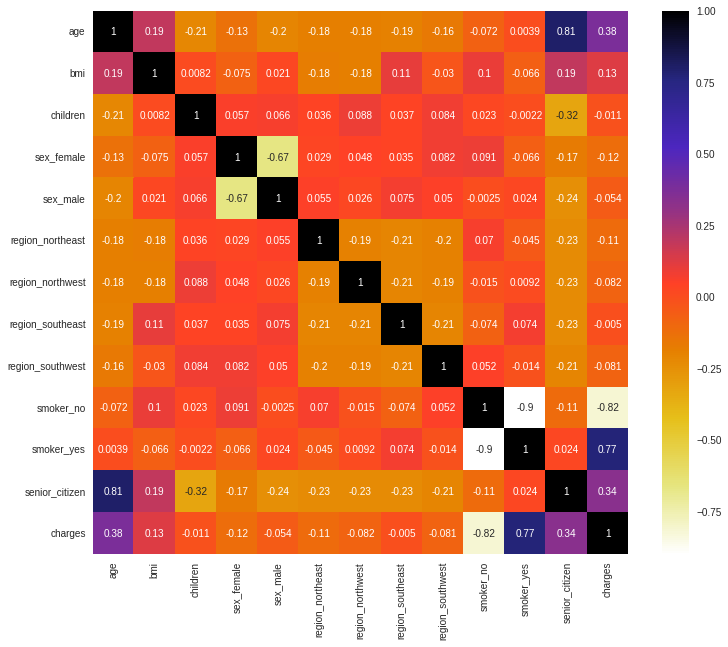

In [186]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor =t_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [187]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [188]:
l=correlation(t_df,0.7)

##**3** . males in the southeast region may be having bmi greater than the avg bmi of all the males.

###t_test using p value

In [189]:
pmean=t_df['charges'].mean()

In [190]:
region=data.loc[data.region=="southeast"]
region=region.loc[region.sex=='male']
region.head()

,age,sex,bmi,children,smoker,region,charges,senior_citizen
patient_id,,,,,,,,
2,18.0,male,33.77,1,no,southeast,1725.5523,0
3,28.0,male,33.00,3,no,southeast,4449.4620,0
15,27.0,male,42.13,0,yes,southeast,39611.7577,0
23,18.0,male,34.10,0,no,southeast,1137.0110,0
43,41.0,male,21.78,1,no,southeast,6272.4772,0


In [191]:
sample_region=region.sample(20)
sample_region.head()

,age,sex,bmi,children,smoker,region,charges,senior_citizen
patient_id,,,,,,,,
697,41.0,male,35.750000,1,yes,southeast,40273.645500,0
1338,39.0,male,30.675161,0,yes,southeast,13261.018027,0
1023,18.0,male,23.320000,1,no,southeast,1711.026800,0
143,34.0,male,25.300000,0,yes,southeast,18972.495000,0
238,31.0,male,38.390000,2,no,southeast,4463.205100,0


In [192]:
sample_mean=sample_region['bmi'].mean()
sample_mean

34.60525805243445

In [193]:
data_male=data.loc[data.sex=="male"]
data_male.head()

,age,sex,bmi,children,smoker,region,charges,senior_citizen
patient_id,,,,,,,,
2,18.0,male,33.770,1,no,southeast,1725.55230,0
3,28.0,male,33.000,3,no,southeast,4449.46200,0
4,33.0,male,22.705,0,no,northwest,21984.47061,0
5,32.0,male,28.880,0,no,northwest,3866.85520,0
9,37.0,male,29.830,2,no,northeast,6406.41070,0


In [194]:
mean_x=data_male['bmi'].mean()
mean_x

30.966413436606587

In [195]:
sample_std=sample_region['bmi'].std()

In [196]:
alpha=0.05
n=20
degrees_of_freedom=n-1

In [197]:
t = (sample_mean - mean_x)/(sample_std / np.sqrt(n))
t

2.245121262736648

In [198]:
p_val = (1 - st.t.cdf(abs(t), degrees_of_freedom))
p_val

0.018428478643414126

In [199]:
if (p_val > alpha):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Reject null hypothesis


## **4** charges for age group 1 may be less than average of all age groups

In [200]:
sm_df=t_df[t_df['age_group']=="1"]


In [201]:
l.add('sex_female')

In [202]:
smean=sm_df['charges'].mean()

In [203]:
pmean=t_df['charges'].mean()

In [204]:
n = len(sm_df)
sigma=t_df['charges'].std()
alpha = 0.05
z_critical= (st.norm.ppf(alpha))
z = (smean-pmean)/(sigma/np.sqrt(n))

In [205]:
if (z > z_critical):
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Reject null hypothesis


In [206]:
t_df.drop(l,axis=1,inplace=True)

In [207]:
l

{'charges', 'senior_citizen', 'sex_female', 'smoker_yes'}

In [208]:
t_df['charges']=balanced_df['charges']
t_df['charges']

0       16884.924000
1        1725.552300
2        4449.462000
3       21984.470610
4        3866.855200
            ...     
2471    13455.141662
2472    13548.378411
2473    27017.495440
2474    47007.418696
2475    13512.803165
Name: charges, Length: 2476, dtype: float64

In [209]:
t_df.head()

,age,bmi,children,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,weight_class,age_group,charges
0,19.0,27.900,0,0,0,0,0,1,0,2,1,16884.92400
1,18.0,33.770,1,1,0,0,1,0,1,3,1,1725.55230
2,28.0,33.000,3,1,0,0,1,0,1,3,1,4449.46200
3,33.0,22.705,0,1,0,1,0,0,1,1,2,21984.47061
4,32.0,28.880,0,1,0,1,0,0,1,2,2,3866.85520


# REGRESSION

In [210]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import PredictionError
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor

In [211]:
y = t_df.charges
X = t_df.drop(["charges"], axis = 1)

In [212]:
region=region.loc[region.sex=="male"]
region.head()

,age,sex,bmi,children,smoker,region,charges,senior_citizen
patient_id,,,,,,,,
2,18.0,male,33.77,1,no,southeast,1725.5523,0
3,28.0,male,33.00,3,no,southeast,4449.4620,0
15,27.0,male,42.13,0,yes,southeast,39611.7577,0
23,18.0,male,34.10,0,no,southeast,1137.0110,0
43,41.0,male,21.78,1,no,southeast,6272.4772,0


In [213]:
ma=max(y)
mi=min(y)
ma,mi

(62592.87309, 1121.8739)

In [214]:
test_size = 0.25
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = test_size)

In [215]:
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_test shape {}, len {}.".format(X_test.shape,len(X_test)))
print("Y_train shape {}, len {}.".format(Y_train.shape,len(Y_train)))
print("Y_test shape {}, len {}.".format(Y_test.shape,len(Y_test)))

X_train shape (1857, 11), len 1857.
X_test shape (619, 11), len 619.
Y_train shape (1857,), len 1857.
Y_test shape (619,), len 619.


In [216]:
result = []

##LINEAR REGRESSION

In [217]:
multiple_linear = LinearRegression()
multiple_linear.fit(X_train, Y_train)
predict = multiple_linear.predict(X_test)
score = r2_score(Y_test,predict)
result.append(score)

In [218]:
Y_test[:10]

1815    29541.502952
965      1759.338000
2062    13942.205029
7        7281.505600
730     40419.019100
61       4504.662400
1220    60021.398970
2032    13813.246199
1380    29298.062955
1972    13851.591603
Name: charges, dtype: float64

In [219]:
print("r_square score --> ",score)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, predict)/(ma-mi))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, predict)/(ma-mi)**2)
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, predict)/(ma-mi)**2))

r_square score -->  0.8014451947490444
Mean Absolute Error --> 0.06293080690906402
Mean Squared Error --> 0.008450184472544343
Root Mean Squared Error --> 0.09192488494713683


In [220]:
df_linearRegression = pd.DataFrame({'Actual': Y_test, 'Predicted': predict})
df_linearRegression.head(5)

,Actual,Predicted
1815,29541.502952,35372.336675
965,1759.338000,6592.283383
2062,13942.205029,12175.790187
7,7281.505600,7678.555645
730,40419.019100,30872.610430


##RANDOM FOREST

In [221]:
rf_random = RandomForestRegressor()
rf_random.fit(X_train, Y_train)
rf_predict = rf_random.predict(X_test)
score_rf = r2_score(Y_test,rf_predict)
result.append(score_rf)

In [222]:
print("r_square score --> ",score_rf)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, rf_predict)/(ma-mi))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, rf_predict)/(ma-mi)**2)
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, rf_predict)/(ma-mi)**2))

r_square score -->  0.9038305258729029
Mean Absolute Error --> 0.028460849623360557
Mean Squared Error --> 0.0040928236210371945
Root Mean Squared Error --> 0.06397517972649389


In [223]:
df_RandomForestRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': rf_predict})
df_RandomForestRegressor.head()

,Actual,Predicted
1815,29541.502952,29475.306566
965,1759.338000,2116.307900
2062,13942.205029,13867.986921
7,7281.505600,6511.012760
730,40419.019100,41074.342836


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


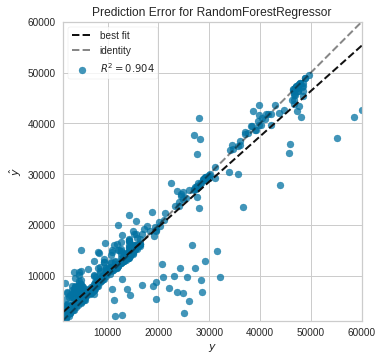

In [224]:
visualizer = PredictionError(rf_random)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)        
visualizer.show();

##KNN

In [225]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)
knn_predict = knn.predict(X_test)
score_knn = r2_score(Y_test,knn_predict)
result.append(score_knn)

In [226]:
print("r_square score --> ",score_knn)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, knn_predict)/(ma-mi))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, knn_predict)/(ma-mi)**2)
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, knn_predict)/(ma-mi)**2))

r_square score -->  0.5488224611161234
Mean Absolute Error --> 0.07518612412741776
Mean Squared Error --> 0.01920141609576561
Root Mean Squared Error --> 0.1385691744067403


In [227]:
df_KNNRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': knn_predict})
df_KNNRegressor.head()

,Actual,Predicted
1815,29541.502952,29635.006077
965,1759.338000,1937.611770
2062,13942.205029,13748.070512
7,7281.505600,6758.958790
730,40419.019100,15065.878166


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


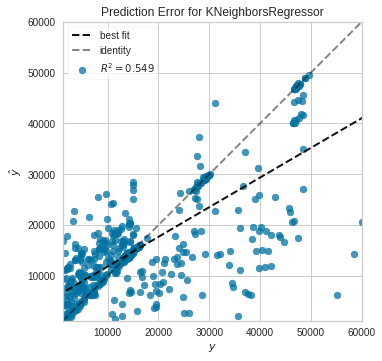

In [228]:
visualizer = PredictionError(knn)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)        
visualizer.show();

##MLP

In [229]:
parameter_mlp = {
    'hidden_layer_sizes': [(50,50,50), (50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'max_iter':[400, 500],
}

In [230]:
model = MLPRegressor()
model.fit(X_train,Y_train)
mlp_predict = model.predict(X_test)
score_mlp = r2_score(Y_test,mlp_predict)
result.append(score_mlp)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [231]:
print("r_square score --> ",score_mlp)
print('Mean Absolute Error -->', metrics.mean_absolute_error(Y_test, mlp_predict)/(ma-mi))
print('Mean Squared Error -->', metrics.mean_squared_error(Y_test, mlp_predict)/(ma-mi)**2)
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(Y_test, mlp_predict)/(ma-mi)**2))

r_square score -->  0.13570211828517453
Mean Absolute Error --> 0.15449449322623
Mean Squared Error --> 0.03678317696964645
Root Mean Squared Error --> 0.19178940786614482


In [232]:
df_MLPRegressor = pd.DataFrame({'Actual': Y_test, 'Predicted': mlp_predict})
df_MLPRegressor.head()

,Actual,Predicted
1815,29541.502952,18338.644553
965,1759.338000,12365.358848
2062,13942.205029,18482.554189
7,7281.505600,13885.386304
730,40419.019100,15479.870208


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  "X does not have valid feature names, but"


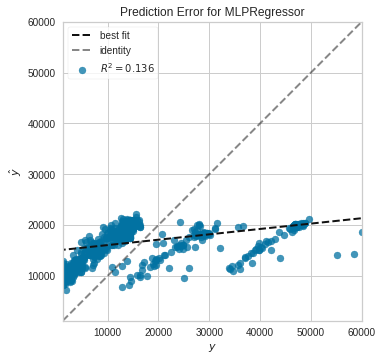

In [233]:
visualizer = PredictionError(model)
visualizer.fit(X_train, Y_train)  
visualizer.score(X_test, Y_test)        
visualizer.show();

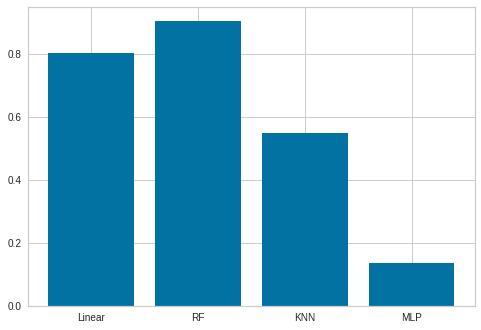

In [234]:
plt.bar(["Linear","RF","KNN","MLP"],result)
plt.show()

##Conclusion : 

 After completion data processing and cleaning, by performing Exploratory Data
Analysis the observations are as follows:

i)Smokers have more charges compared to non-smokers.


ii)Irrespective of region and Gender:

people who smoke are having high charges compared to people who don't smoke.

iii)And people who smoke are of age group 18-35 in most regions.


iv)And some people are having High charges even though they do not smoke.

Those people are having high Charges because 

Either:

they are old and have lot of health issues.

And have Some other disability or health issues.




The Assumptions made from the Data are as follows:

i)charges for smokers are greater than that of the average of charges of all patients.

ii)charges of smokers in northwest region is less than average charges of all the smokers.

iii)males in the southeast region may be having bmi greater than the avg bmi of all the males.

iv)charges for age group 1 may be less than average of all age groups.

From the above first Three assumptions cannot be rejected but the fourth one can be rejected.



Predictions made from regression:

The RMSE score of predictions from various models is as follows:

Linear Regression:

Root Mean Squared Error --> 0.09170473467214893

Random Forest:

Root Mean Squared Error --> 0.06289152093289532

KNN:

Root Mean Squared Error --> 0.13349491837787034

MLP:

Root Mean Squared Error --> 0.19254906350108572

The least RMSE is found in Random Forest Model.

So, it is the best model for prediction.